# Phase 4 Project Notebook
- Author: Jonathan Holt
- Data Science Flex

## Business Problem
- What are the top 5 best zip codes for us to invest in?

## Questions to Answer

1. What is the average (mean) home price for zip codes?
    a. also by: State, Metro Region, etc.
2. Which zip codes performed above expectations?
3. Do the top performing zip codes have any identifiers?


## What Models & Metrics I plan on using

## Helper Functions
- Functions provided by Flatiron

In [1]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [2]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [3]:
#function for displaying money in millions.
def display_millions(x, pos):
    return '${:1.1f}M'.format(x*1e-6)

# PreProcessing

## Loading Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 1500) #change the amount of rows displayed

pd.options.display.float_format = '{:,.2f}'.format 

In [5]:
ts = pd.read_csv("zillow_data.csv")
#ts = pd.read_csv('zillow_data.csv', index_col='Date')

In [6]:
ts.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank    1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
0         1 334,200.00 335,400.00 336,500.00  ...  1005500  1007500  1007800   
1         2 235,700.00 236,900.00 236,700.00  ...   308000   310000   312500   
2         3 210,400.00 212,200.00 212,200.00  ...   321000   320600   320200   
3         4 498,100.00 500,900.00 503,100.00  ...  1289800  1287700  1287400   
4         5  77,300.00  77,300.00  77,300.00  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

##  Fixing RegionName
A google search shows that RegionName is the ZipCode for each Region. However, upon sorting, I discovered that any ZipCode beginning with a 0 was ignoring it and displaying as a 4 digit number. I will use the .str().zfill() method to ensure that all RegionNames are displaying the as 5 digits.

In [7]:
ts['RegionName'] = ts['RegionName'].astype(str).str.zfill(5)

In [8]:
# Change to ZipCode?

## Checking for Null Values

In [9]:
ts.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01     

### Analysis
There are many Null Values. 
- For categorical data, 7% of Metro are null (1043 of 14,723).
- Dates from 1996 - mid 2003, also have 7% null values.
- Then it starts to get better. 6% null and decreasing.

What is my decision on null values?
- keep?
- delete?
- change (mean)?

### Metro

In [10]:
ts['Metro'].value_counts()

New York                              779
Los Angeles-Long Beach-Anaheim        347
Chicago                               325
Philadelphia                          281
Washington                            249
Boston                                246
Dallas-Fort Worth                     217
Minneapolis-St Paul                   201
Houston                               187
Pittsburgh                            177
Miami-Fort Lauderdale                 162
Portland                              161
Detroit                               153
Atlanta                               152
Seattle                               141
St. Louis                             140
San Francisco                         134
Kansas City                           127
Phoenix                               126
Baltimore                             122
Tampa                                 118
Riverside                             116
Cincinnati                            109
Denver                            

In [11]:
ts['Metro'].fillna('no_metro', inplace=True)

In [12]:
ts['Metro'].value_counts()

no_metro                              1043
New York                               779
Los Angeles-Long Beach-Anaheim         347
Chicago                                325
Philadelphia                           281
Washington                             249
Boston                                 246
Dallas-Fort Worth                      217
Minneapolis-St Paul                    201
Houston                                187
Pittsburgh                             177
Miami-Fort Lauderdale                  162
Portland                               161
Detroit                                153
Atlanta                                152
Seattle                                141
St. Louis                              140
San Francisco                          134
Kansas City                            127
Phoenix                                126
Baltimore                              122
Tampa                                  118
Riverside                              116
Cincinnati 

## Dealing with Nulls

DEAL WITH NULLS HERE!

In [13]:
ts.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro            0
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01     

In [14]:
#df.fillna(df.mean(), inplace=True)

In [15]:
# I didn't like what this method did
#df.fillna(method='bfill', inplace=True)

In [16]:
#df.isna().sum()

### Analysis:
- I think it's okay to leave the NaN values for now as these records appear to be in rural areas where there wouldn't be close enough to a city to be considered part of the Metro area. 
- I only plan on using Metro area to look at cities anyway, so there shouldn't be a penalty or unneccessary exlusion on any of the records lacking Metro values

## Creating Avg_home_df
- Create Dataset that is just the mean values to do analysis of trends, etc for baseline.
- then I can look for zip codes that have the best performance above and beyong baseline.

In [17]:
#ts_value = ts.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])
#avg_home_ts = ts_value.reset_index()
#avg_home_ts['time'] = pd.to_datetime(avg_home_ts['index'])
#avg_home_ts.set_index('time', inplace=True)
#avg_home_ts.rename(columns={0: 'home_value'}, inplace=True)
#avg_home_ts.drop(columns=('index'), inplace=True)
#avg_home_ts.head()

In [18]:
ts_value = ts.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])

In [19]:
avg_home_ts = pd.DataFrame(ts_value.mean())

In [20]:
avg_home_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 1996-04 to 2018-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       265 non-null    float64
dtypes: float64(1)
memory usage: 4.1+ KB


In [21]:
avg_home_ts.head()

0
1996-04 118,299.12
1996-05 118,419.04
1996-06 118,537.42
1996-07 118,653.07
1996-08 118,780.25

In [22]:
avg_home_ts = avg_home_ts.reset_index()
avg_home_ts['time'] = pd.to_datetime(avg_home_ts['index'])
avg_home_ts.head()

index          0       time
0  1996-04 118,299.12 1996-04-01
1  1996-05 118,419.04 1996-05-01
2  1996-06 118,537.42 1996-06-01
3  1996-07 118,653.07 1996-07-01
4  1996-08 118,780.25 1996-08-01

In [23]:
avg_home_ts.set_index('time', inplace=True)

In [24]:
avg_home_ts.head()

index          0
time                          
1996-04-01  1996-04 118,299.12
1996-05-01  1996-05 118,419.04
1996-06-01  1996-06 118,537.42
1996-07-01  1996-07 118,653.07
1996-08-01  1996-08 118,780.25

In [25]:
avg_home_ts.rename(columns={0: 'home_value'}, inplace=True)

In [26]:
avg_home_ts.drop(columns=('index'), inplace=True)

In [27]:
avg_home_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_value  265 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [28]:
avg_home_ts

home_value
time                  
1996-04-01  118,299.12
1996-05-01  118,419.04
1996-06-01  118,537.42
1996-07-01  118,653.07
1996-08-01  118,780.25
1996-09-01  118,927.53
1996-10-01  119,120.52
1996-11-01  119,345.35
1996-12-01  119,685.08
1997-01-01  120,121.27
1997-02-01  120,544.24
1997-03-01  120,896.62
1997-04-01  121,268.17
1997-05-01  121,655.90
1997-06-01  122,053.11
1997-07-01  122,456.34
1997-08-01  122,879.93
1997-09-01  123,327.40
1997-10-01  123,823.11
1997-11-01  124,353.74
1997-12-01  125,002.60
1998-01-01  125,736.67
1998-02-01  126,450.78
1998-03-01  127,086.26
1998-04-01  127,736.36
1998-05-01  128,385.01
1998-06-01  129,032.70
1998-07-01  129,676.36
1998-08-01  130,324.52
1998-09-01  130,982.62
1998-10-01  131,678.09
1998-11-01  132,399.34
1998-12-01  133,224.70
1999-01-01  134,133.59
1999-02-01  135,020.88
1999-03-01  135,841.59
1999-04-01  136,683.79
1999-05-01  137,532.15
1999-06-01  138,391.81
1999-07-01  139,265.16
1999-08-01  140,160.60
1999-09-01  141,084.83
1999-10-01  142,070.10
1999-11-01  143,104.04
1999-12-01  144,261.33
2000-01-01  145,522.06
2000-02-01  146,772.27
2000-03-01  147,943.68
2000-04-01  149,107.82
2000-05-01  150,247.76
2000-06-01  151,364.61
2000-07-01  152,457.02
2000-08-01  153,530.93
2000-09-01  154,597.19
2000-10-01  155,691.10
2000-11-01  156,804.24
2000-12-01  157,978.35
2001-01-01  159,201.78
2001-02-01  160,410.85
2001-03-01  161,555.95
2001-04-01  162,664.35
2001-05-01  163,717.37
2001-06-01  164,729.62
2001-07-01  165,707.86
2001-08-01  166,666.39
2001-09-01  167,634.31
2001-10-01  168,653.36
2001-11-01  169,714.37
2001-12-01  170,846.29
2002-01-01  172,058.12
2002-02-01  173,311.94
2002-03-01  174,550.06
2002-04-01  175,769.28
2002-05-01  176,957.56
2002-06-01  178,131.76
2002-07-01  179,301.91
2002-08-01  180,477.89
2002-09-01  181,696.49
2002-10-01  182,962.91
2002-11-01  184,453.16
2002-12-01  186,098.17
2003-01-01  187,610.68
2003-02-01  188,930.16
2003-03-01  190,295.62
2003-04-01  191,691.76
2003-05-01  193,112.99
2003-06-01  194,601.80
2003-07-01  196,006.78
2003-08-01  197,610.87
2003-09-01  199,257.67
2003-10-01  200,939.57
2003-11-01  202,586.61
2003-12-01  204,228.36
2004-01-01  207,492.62
2004-02-01  209,244.22
2004-03-01  211,168.04
2004-04-01  213,296.51
2004-05-01  215,615.42
2004-06-01  218,136.25
2004-07-01  220,658.17
2004-08-01  223,353.45
2004-09-01  226,056.90
2004-10-01  228,744.64
2004-11-01  231,299.47
2004-12-01  233,785.47
2005-01-01  236,197.43
2005-02-01  238,563.12
2005-03-01  240,871.02
2005-04-01  243,402.18
2005-05-01  245,934.66
2005-06-01  248,474.87
2005-07-01  250,549.56
2005-08-01  252,925.44
2005-09-01  255,151.63
2005-10-01  257,204.99
2005-11-01  258,995.54
2005-12-01  260,551.18
2006-01-01  261,477.01
2006-02-01  262,687.49
2006-03-01  263,850.58
2006-04-01  264,959.11
2006-05-01  265,878.71
2006-06-01  266,561.96
2006-07-01  266,695.60
2006-08-01  266,818.04
2006-09-01  266,757.14
2006-10-01  266,590.88
2006-11-01  266,316.52
2006-12-01  266,090.97
2007-01-01  265,816.83
2007-02-01  265,624.76
2007-03-01  265,366.33
2007-04-01  265,036.42
2007-05-01  264,491.78
2007-06-01  263,696.34
2007-07-01  262,677.17
2007-08-01  261,586.20
2007-09-01  260,415.58
2007-10-01  259,139.14
2007-11-01  257,695.78
2007-12-01  256,114.81
2008-01-01  254,395.86
2008-02-01  252,515.80
2008-03-01  250,538.73
2008-04-01  248,491.58
2008-05-01  246,309.46
2008-06-01  243,985.66
2008-07-01  241,710.34
2008-08-01  239,648.21
2008-09-01  237,774.27
2008-10-01  236,009.73
2008-11-01  234,330.39
2008-12-01  232,780.84
2009-01-01  231,308.67
2009-02-01  229,820.52
2009-03-01  228,199.29
2009-04-01  226,440.44
2009-05-01  224,442.20
2009-06-01  222,453.67
2009-07-01  220,988.60
2009-08-01  220,049.08
2009-09-01  219,437.45
2009-10-01  219,064.36
2009-11-01  218,900.53
2009-12-01  218,844.04
2010-01-01  218,812.23
2010-02-01  219,116.76
2010-03-01  216,704.31
2010-04-01  215,818.03
2010-05-01  215,273.66
2010-06-01  215,196.93
2010-07-01  214,382.82
2010-08-01

In [29]:
avg_home_ts.index[0].year

1996

In [30]:
avg_home_ts['2000':]

home_value
time                  
2000-01-01  145,522.06
2000-02-01  146,772.27
2000-03-01  147,943.68
2000-04-01  149,107.82
2000-05-01  150,247.76
2000-06-01  151,364.61
2000-07-01  152,457.02
2000-08-01  153,530.93
2000-09-01  154,597.19
2000-10-01  155,691.10
2000-11-01  156,804.24
2000-12-01  157,978.35
2001-01-01  159,201.78
2001-02-01  160,410.85
2001-03-01  161,555.95
2001-04-01  162,664.35
2001-05-01  163,717.37
2001-06-01  164,729.62
2001-07-01  165,707.86
2001-08-01  166,666.39
2001-09-01  167,634.31
2001-10-01  168,653.36
2001-11-01  169,714.37
2001-12-01  170,846.29
2002-01-01  172,058.12
2002-02-01  173,311.94
2002-03-01  174,550.06
2002-04-01  175,769.28
2002-05-01  176,957.56
2002-06-01  178,131.76
2002-07-01  179,301.91
2002-08-01  180,477.89
2002-09-01  181,696.49
2002-10-01  182,962.91
2002-11-01  184,453.16
2002-12-01  186,098.17
2003-01-01  187,610.68
2003-02-01  188,930.16
2003-03-01  190,295.62
2003-04-01  191,691.76
2003-05-01  193,112.99
2003-06-01  194,601.80
2003-07-01  196,006.78
2003-08-01  197,610.87
2003-09-01  199,257.67
2003-10-01  200,939.57
2003-11-01  202,586.61
2003-12-01  204,228.36
2004-01-01  207,492.62
2004-02-01  209,244.22
2004-03-01  211,168.04
2004-04-01  213,296.51
2004-05-01  215,615.42
2004-06-01  218,136.25
2004-07-01  220,658.17
2004-08-01  223,353.45
2004-09-01  226,056.90
2004-10-01  228,744.64
2004-11-01  231,299.47
2004-12-01  233,785.47
2005-01-01  236,197.43
2005-02-01  238,563.12
2005-03-01  240,871.02
2005-04-01  243,402.18
2005-05-01  245,934.66
2005-06-01  248,474.87
2005-07-01  250,549.56
2005-08-01  252,925.44
2005-09-01  255,151.63
2005-10-01  257,204.99
2005-11-01  258,995.54
2005-12-01  260,551.18
2006-01-01  261,477.01
2006-02-01  262,687.49
2006-03-01  263,850.58
2006-04-01  264,959.11
2006-05-01  265,878.71
2006-06-01  266,561.96
2006-07-01  266,695.60
2006-08-01  266,818.04
2006-09-01  266,757.14
2006-10-01  266,590.88
2006-11-01  266,316.52
2006-12-01  266,090.97
2007-01-01  265,816.83
2007-02-01  265,624.76
2007-03-01  265,366.33
2007-04-01  265,036.42
2007-05-01  264,491.78
2007-06-01  263,696.34
2007-07-01  262,677.17
2007-08-01  261,586.20
2007-09-01  260,415.58
2007-10-01  259,139.14
2007-11-01  257,695.78
2007-12-01  256,114.81
2008-01-01  254,395.86
2008-02-01  252,515.80
2008-03-01  250,538.73
2008-04-01  248,491.58
2008-05-01  246,309.46
2008-06-01  243,985.66
2008-07-01  241,710.34
2008-08-01  239,648.21
2008-09-01  237,774.27
2008-10-01  236,009.73
2008-11-01  234,330.39
2008-12-01  232,780.84
2009-01-01  231,308.67
2009-02-01  229,820.52
2009-03-01  228,199.29
2009-04-01  226,440.44
2009-05-01  224,442.20
2009-06-01  222,453.67
2009-07-01  220,988.60
2009-08-01  220,049.08
2009-09-01  219,437.45
2009-10-01  219,064.36
2009-11-01  218,900.53
2009-12-01  218,844.04
2010-01-01  218,812.23
2010-02-01  219,116.76
2010-03-01  216,704.31
2010-04-01  215,818.03
2010-05-01  215,273.66
2010-06-01  215,196.93
2010-07-01  214,382.82
2010-08-01  213,508.93
2010-09-01  212,475.13
2010-10-01  211,428.31
2010-11-01  210,326.58
2010-12-01  209,098.02
2011-01-01  207,595.96
2011-02-01  206,395.60
2011-03-01  205,402.46
2011-04-01  204,642.59
2011-05-01  204,012.63
2011-06-01  203,430.57
2011-07-01  202,726.98
2011-08-01  202,212.49
2011-09-01  201,718.71
2011-10-01  201,293.19
2011-11-01  200,940.95
2011-12-01  200,644.04
2012-01-01  200,219.76
2012-02-01  200,069.29
2012-03-01  200,272.35
2012-04-01  200,824.66
2012-05-01  201,558.16
2012-06-01  202,274.41
2012-07-01  202,879.53
2012-08-01  203,592.28
2012-09-01  204,337.92
2012-10-01  205,118.25
2012-11-01  206,036.55
2012-12-01  207,004.66
2013-01-01  207,745.45
2013-02-01  208,791.55
2013-03-01  210,145.42
2013-04-01  211,730.79
2013-05-01  213,399.38
2013-06-01  215,113.13
2013-07-01  216,674.80
2013-08-01  218,163.50
2013-09-01  219,413.01
2013-10-01  220,509.59
2013-11-01  221,509.88
2013-12-01  222,473.74
2014-01-01  223,183.21
2014-02-01  224,135.94
2014-03-01  225,082.57
2014-04-01  226,124.78
2014-05-01

In [31]:
#avg_home_df.rename(columns={'0': 'value'}, inplace=True)

In [32]:
avg_home_ts

home_value
time                  
1996-04-01  118,299.12
1996-05-01  118,419.04
1996-06-01  118,537.42
1996-07-01  118,653.07
1996-08-01  118,780.25
1996-09-01  118,927.53
1996-10-01  119,120.52
1996-11-01  119,345.35
1996-12-01  119,685.08
1997-01-01  120,121.27
1997-02-01  120,544.24
1997-03-01  120,896.62
1997-04-01  121,268.17
1997-05-01  121,655.90
1997-06-01  122,053.11
1997-07-01  122,456.34
1997-08-01  122,879.93
1997-09-01  123,327.40
1997-10-01  123,823.11
1997-11-01  124,353.74
1997-12-01  125,002.60
1998-01-01  125,736.67
1998-02-01  126,450.78
1998-03-01  127,086.26
1998-04-01  127,736.36
1998-05-01  128,385.01
1998-06-01  129,032.70
1998-07-01  129,676.36
1998-08-01  130,324.52
1998-09-01  130,982.62
1998-10-01  131,678.09
1998-11-01  132,399.34
1998-12-01  133,224.70
1999-01-01  134,133.59
1999-02-01  135,020.88
1999-03-01  135,841.59
1999-04-01  136,683.79
1999-05-01  137,532.15
1999-06-01  138,391.81
1999-07-01  139,265.16
1999-08-01  140,160.60
1999-09-01  141,084.83
1999-10-01  142,070.10
1999-11-01  143,104.04
1999-12-01  144,261.33
2000-01-01  145,522.06
2000-02-01  146,772.27
2000-03-01  147,943.68
2000-04-01  149,107.82
2000-05-01  150,247.76
2000-06-01  151,364.61
2000-07-01  152,457.02
2000-08-01  153,530.93
2000-09-01  154,597.19
2000-10-01  155,691.10
2000-11-01  156,804.24
2000-12-01  157,978.35
2001-01-01  159,201.78
2001-02-01  160,410.85
2001-03-01  161,555.95
2001-04-01  162,664.35
2001-05-01  163,717.37
2001-06-01  164,729.62
2001-07-01  165,707.86
2001-08-01  166,666.39
2001-09-01  167,634.31
2001-10-01  168,653.36
2001-11-01  169,714.37
2001-12-01  170,846.29
2002-01-01  172,058.12
2002-02-01  173,311.94
2002-03-01  174,550.06
2002-04-01  175,769.28
2002-05-01  176,957.56
2002-06-01  178,131.76
2002-07-01  179,301.91
2002-08-01  180,477.89
2002-09-01  181,696.49
2002-10-01  182,962.91
2002-11-01  184,453.16
2002-12-01  186,098.17
2003-01-01  187,610.68
2003-02-01  188,930.16
2003-03-01  190,295.62
2003-04-01  191,691.76
2003-05-01  193,112.99
2003-06-01  194,601.80
2003-07-01  196,006.78
2003-08-01  197,610.87
2003-09-01  199,257.67
2003-10-01  200,939.57
2003-11-01  202,586.61
2003-12-01  204,228.36
2004-01-01  207,492.62
2004-02-01  209,244.22
2004-03-01  211,168.04
2004-04-01  213,296.51
2004-05-01  215,615.42
2004-06-01  218,136.25
2004-07-01  220,658.17
2004-08-01  223,353.45
2004-09-01  226,056.90
2004-10-01  228,744.64
2004-11-01  231,299.47
2004-12-01  233,785.47
2005-01-01  236,197.43
2005-02-01  238,563.12
2005-03-01  240,871.02
2005-04-01  243,402.18
2005-05-01  245,934.66
2005-06-01  248,474.87
2005-07-01  250,549.56
2005-08-01  252,925.44
2005-09-01  255,151.63
2005-10-01  257,204.99
2005-11-01  258,995.54
2005-12-01  260,551.18
2006-01-01  261,477.01
2006-02-01  262,687.49
2006-03-01  263,850.58
2006-04-01  264,959.11
2006-05-01  265,878.71
2006-06-01  266,561.96
2006-07-01  266,695.60
2006-08-01  266,818.04
2006-09-01  266,757.14
2006-10-01  266,590.88
2006-11-01  266,316.52
2006-12-01  266,090.97
2007-01-01  265,816.83
2007-02-01  265,624.76
2007-03-01  265,366.33
2007-04-01  265,036.42
2007-05-01  264,491.78
2007-06-01  263,696.34
2007-07-01  262,677.17
2007-08-01  261,586.20
2007-09-01  260,415.58
2007-10-01  259,139.14
2007-11-01  257,695.78
2007-12-01  256,114.81
2008-01-01  254,395.86
2008-02-01  252,515.80
2008-03-01  250,538.73
2008-04-01  248,491.58
2008-05-01  246,309.46
2008-06-01  243,985.66
2008-07-01  241,710.34
2008-08-01  239,648.21
2008-09-01  237,774.27
2008-10-01  236,009.73
2008-11-01  234,330.39
2008-12-01  232,780.84
2009-01-01  231,308.67
2009-02-01  229,820.52
2009-03-01  228,199.29
2009-04-01  226,440.44
2009-05-01  224,442.20
2009-06-01  222,453.67
2009-07-01  220,988.60
2009-08-01  220,049.08
2009-09-01  219,437.45
2009-10-01  219,064.36
2009-11-01  218,900.53
2009-12-01  218,844.04
2010-01-01  218,812.23
2010-02-01  219,116.76
2010-03-01  216,704.31
2010-04-01  215,818.03
2010-05-01  215,273.66
2010-06-01  215,196.93
2010-07-01  214,382.82
2010-08-01

## Analysis of Avg_Home_DF

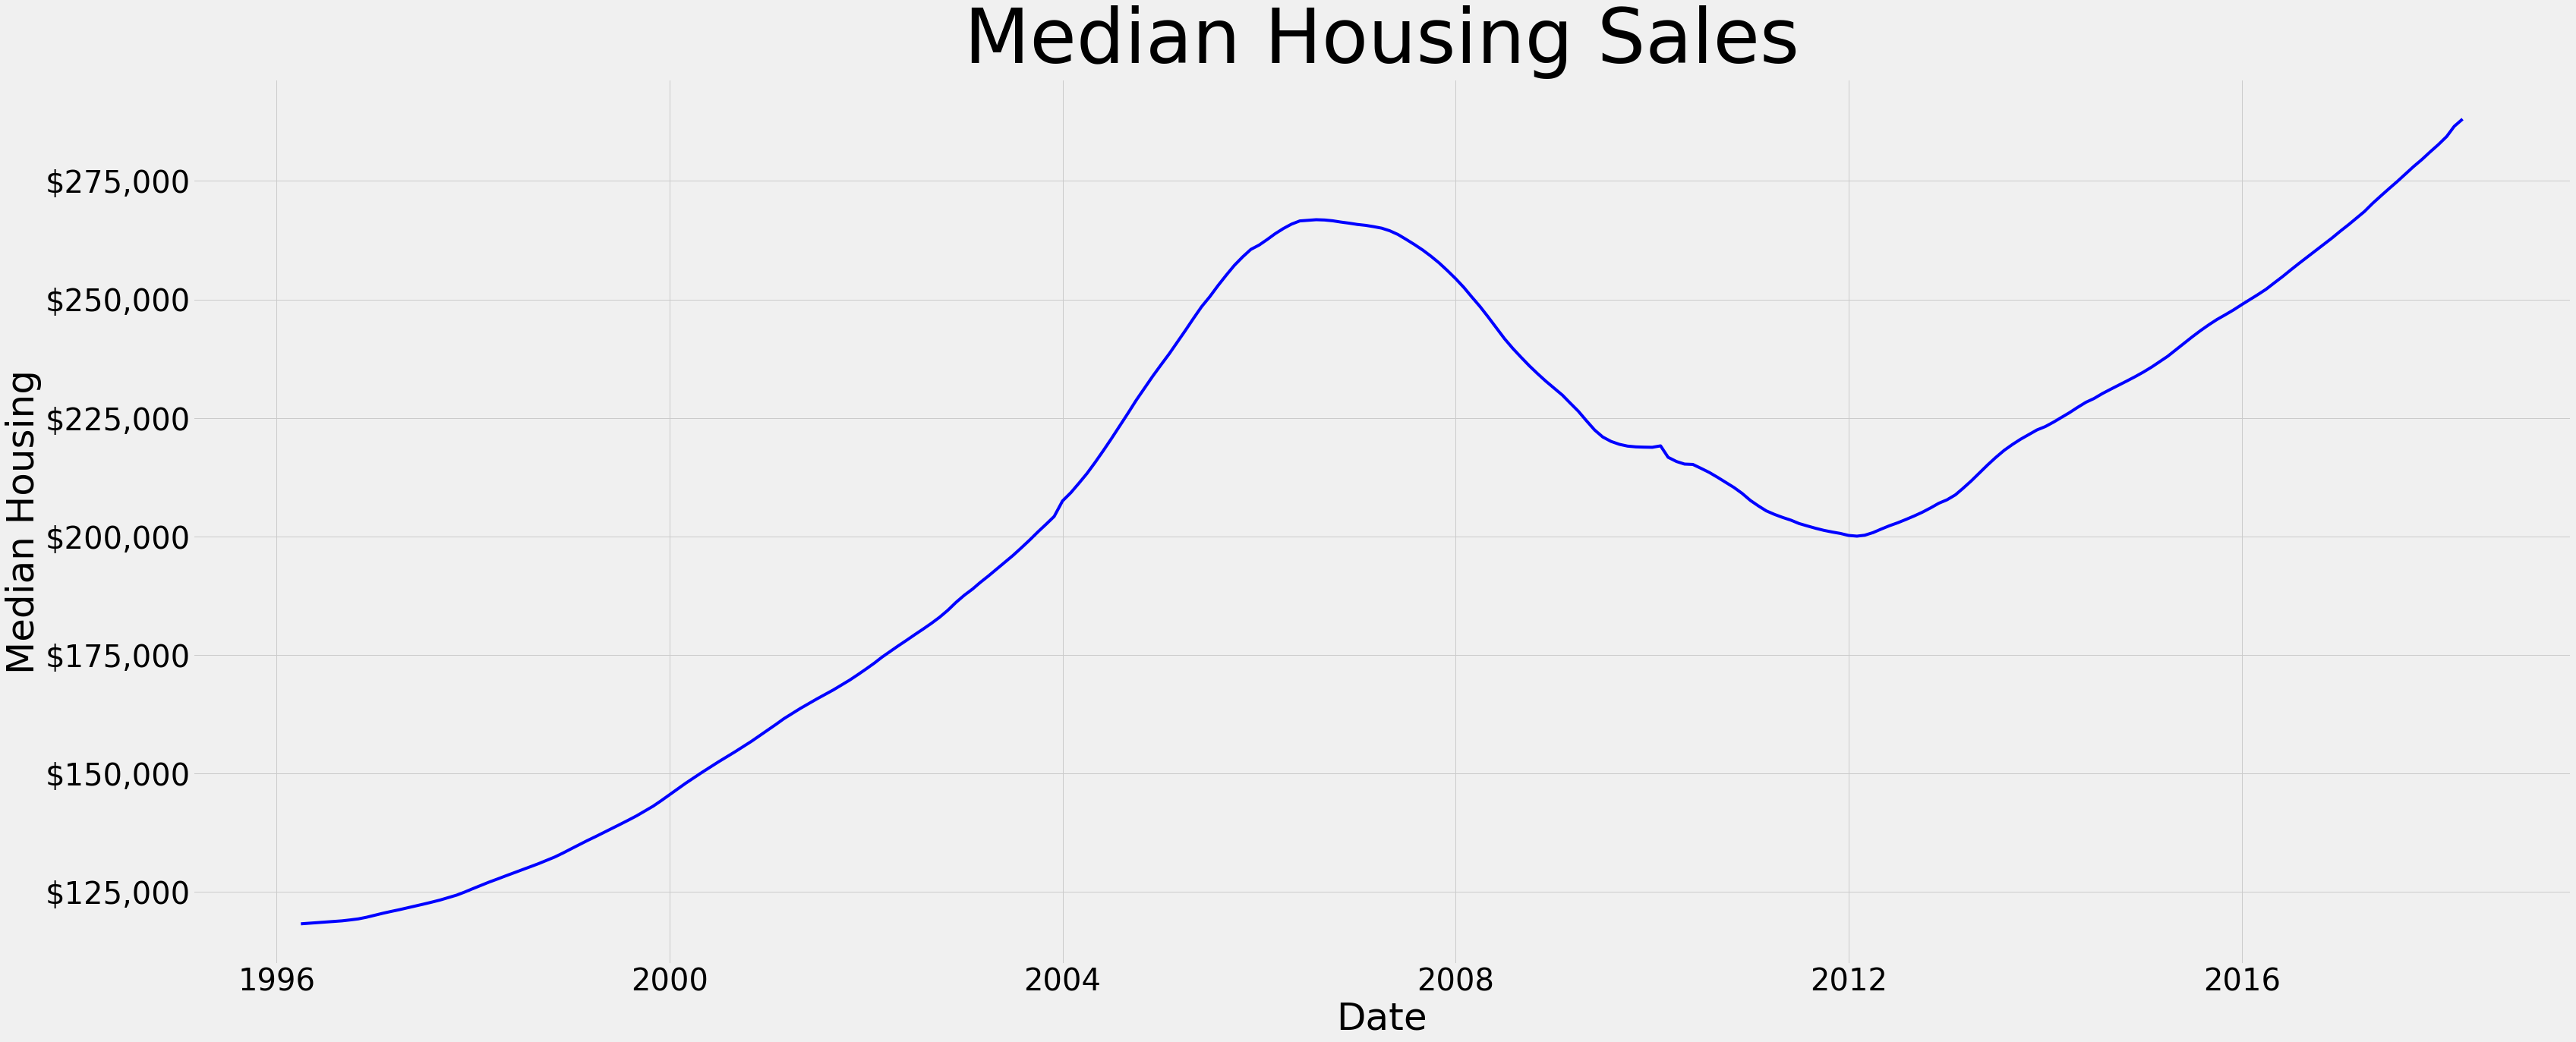

In [33]:
fig, ax = plt.subplots(figsize=(50, 20))
p = sns.lineplot(data=avg_home_ts, x='time', y='home_value', color='blue');

p.set_xlabel("Date", fontsize = 50)
p.set_ylabel("Median Housing", fontsize = 50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales", fontsize = 100)
plt.figsize=(50,25)

plt.show();

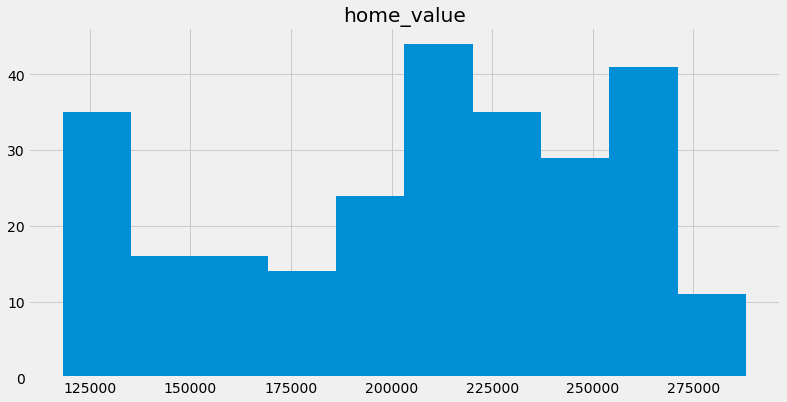

In [34]:
avg_home_ts.hist(figsize = (12,6))
plt.show()

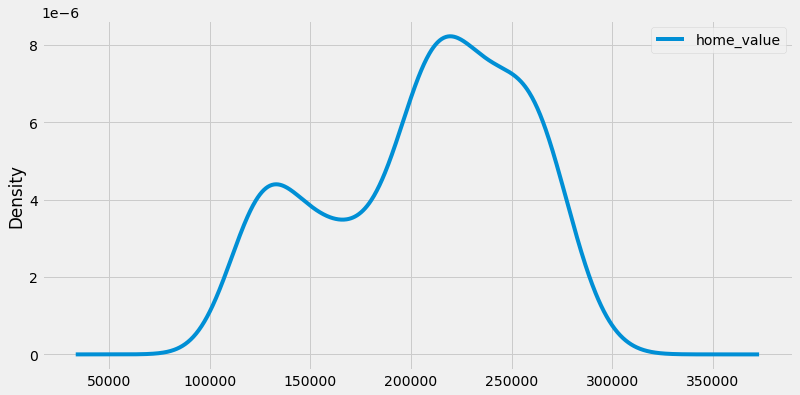

In [35]:
avg_home_ts.plot(kind='kde', figsize = (12,6))
plt.show()

In [36]:
# Determine rolling statistics
roll_mean = avg_home_ts.rolling(window=12, center=False).mean()
roll_std = avg_home_ts.rolling(window=12, center=False).std()

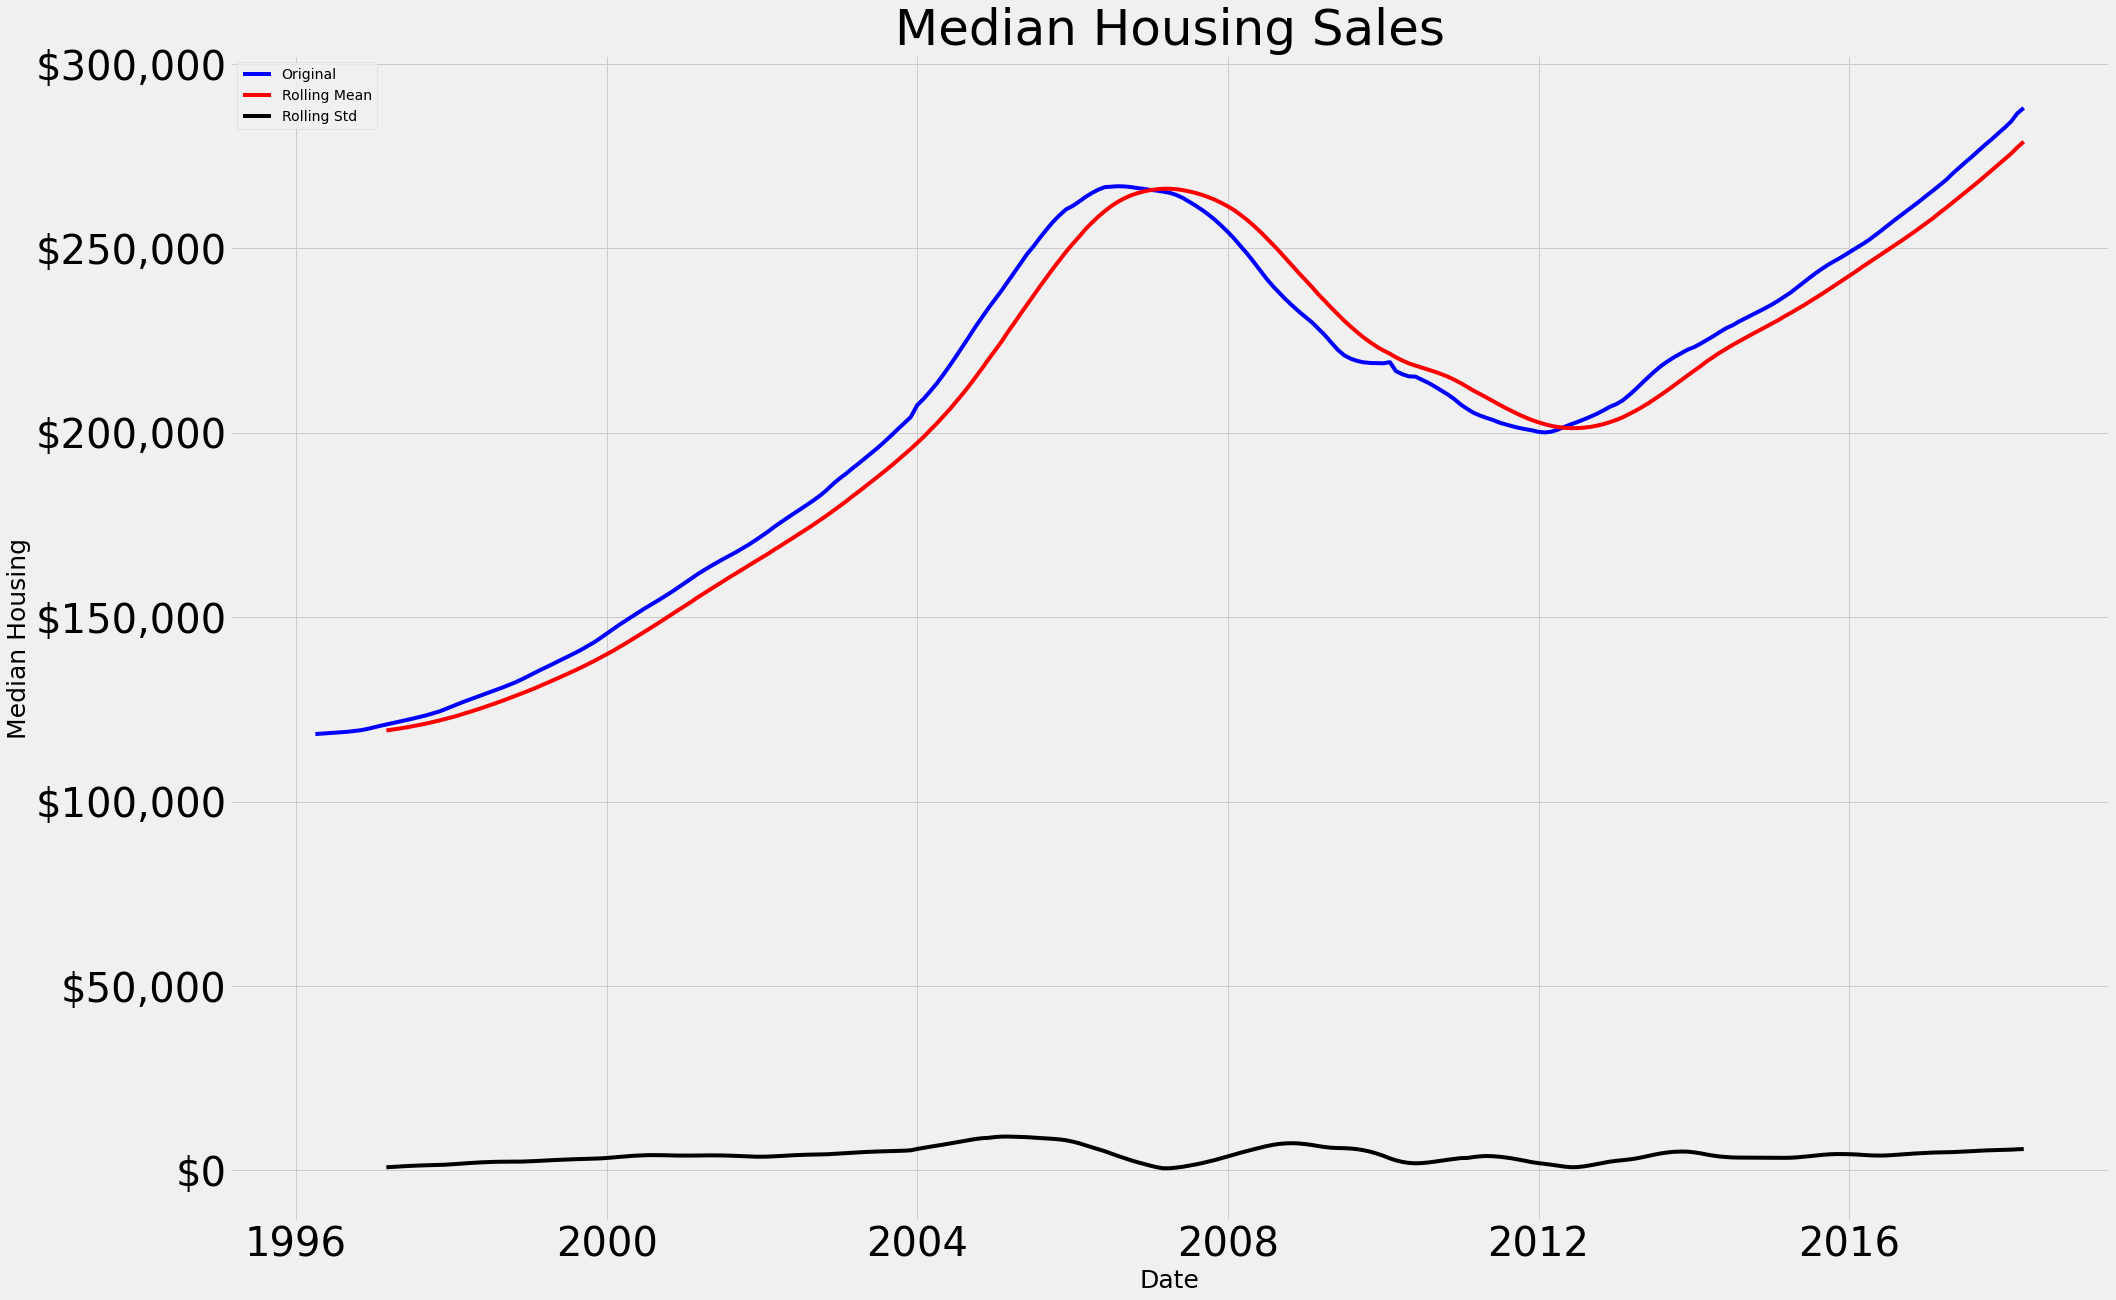

In [37]:
fig, ax = plt.subplots(figsize=(30, 20))
p = sns.lineplot(data=avg_home_ts, x='time', y='home_value', color='blue', label='Original');

plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')

p.set_xlabel("Date", fontsize = 25)
p.set_ylabel("Median Housing", fontsize = 25)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales", fontsize = 50)
plt.figsize=(50,25)
plt.legend(loc='best')

plt.show();

## Dickey Fuller Test

In [38]:
# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
#dftest = adfuller(data['#Passengers'])
dftest = adfuller(avg_home_ts)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                 -1.89
p-value                         0.34
#Lags Used                      2.00
Number of Observations Used   262.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.87
Critical Value (10%)           -2.57
dtype: float64


## Removing Trends

In [39]:
avg_home_ts.head()

home_value
time                  
1996-04-01  118,299.12
1996-05-01  118,419.04
1996-06-01  118,537.42
1996-07-01  118,653.07
1996-08-01  118,780.25

In [40]:
#code to quickly get log of values
#avg_home_ts['home_value']= np.log(avg_home_ts['home_value'])

In [41]:
avg_home_ts.head()

home_value
time                  
1996-04-01  118,299.12
1996-05-01  118,419.04
1996-06-01  118,537.42
1996-07-01  118,653.07
1996-08-01  118,780.25

### Taking Log of Data

In [42]:
avg_home_ts_log = avg_home_ts.copy()
avg_home_ts_log['home_value'] = np.log(avg_home_ts['home_value'])
avg_home_ts_log.head()

home_value
time                  
1996-04-01       11.68
1996-05-01       11.68
1996-06-01       11.68
1996-07-01       11.68
1996-08-01       11.69

<AxesSubplot:xlabel='time'>

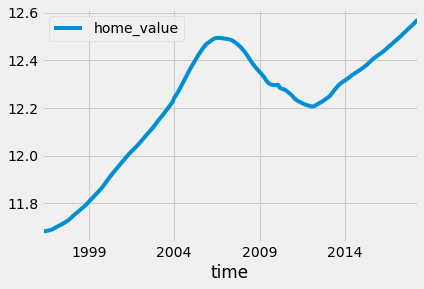

In [43]:
avg_home_ts_log.plot()

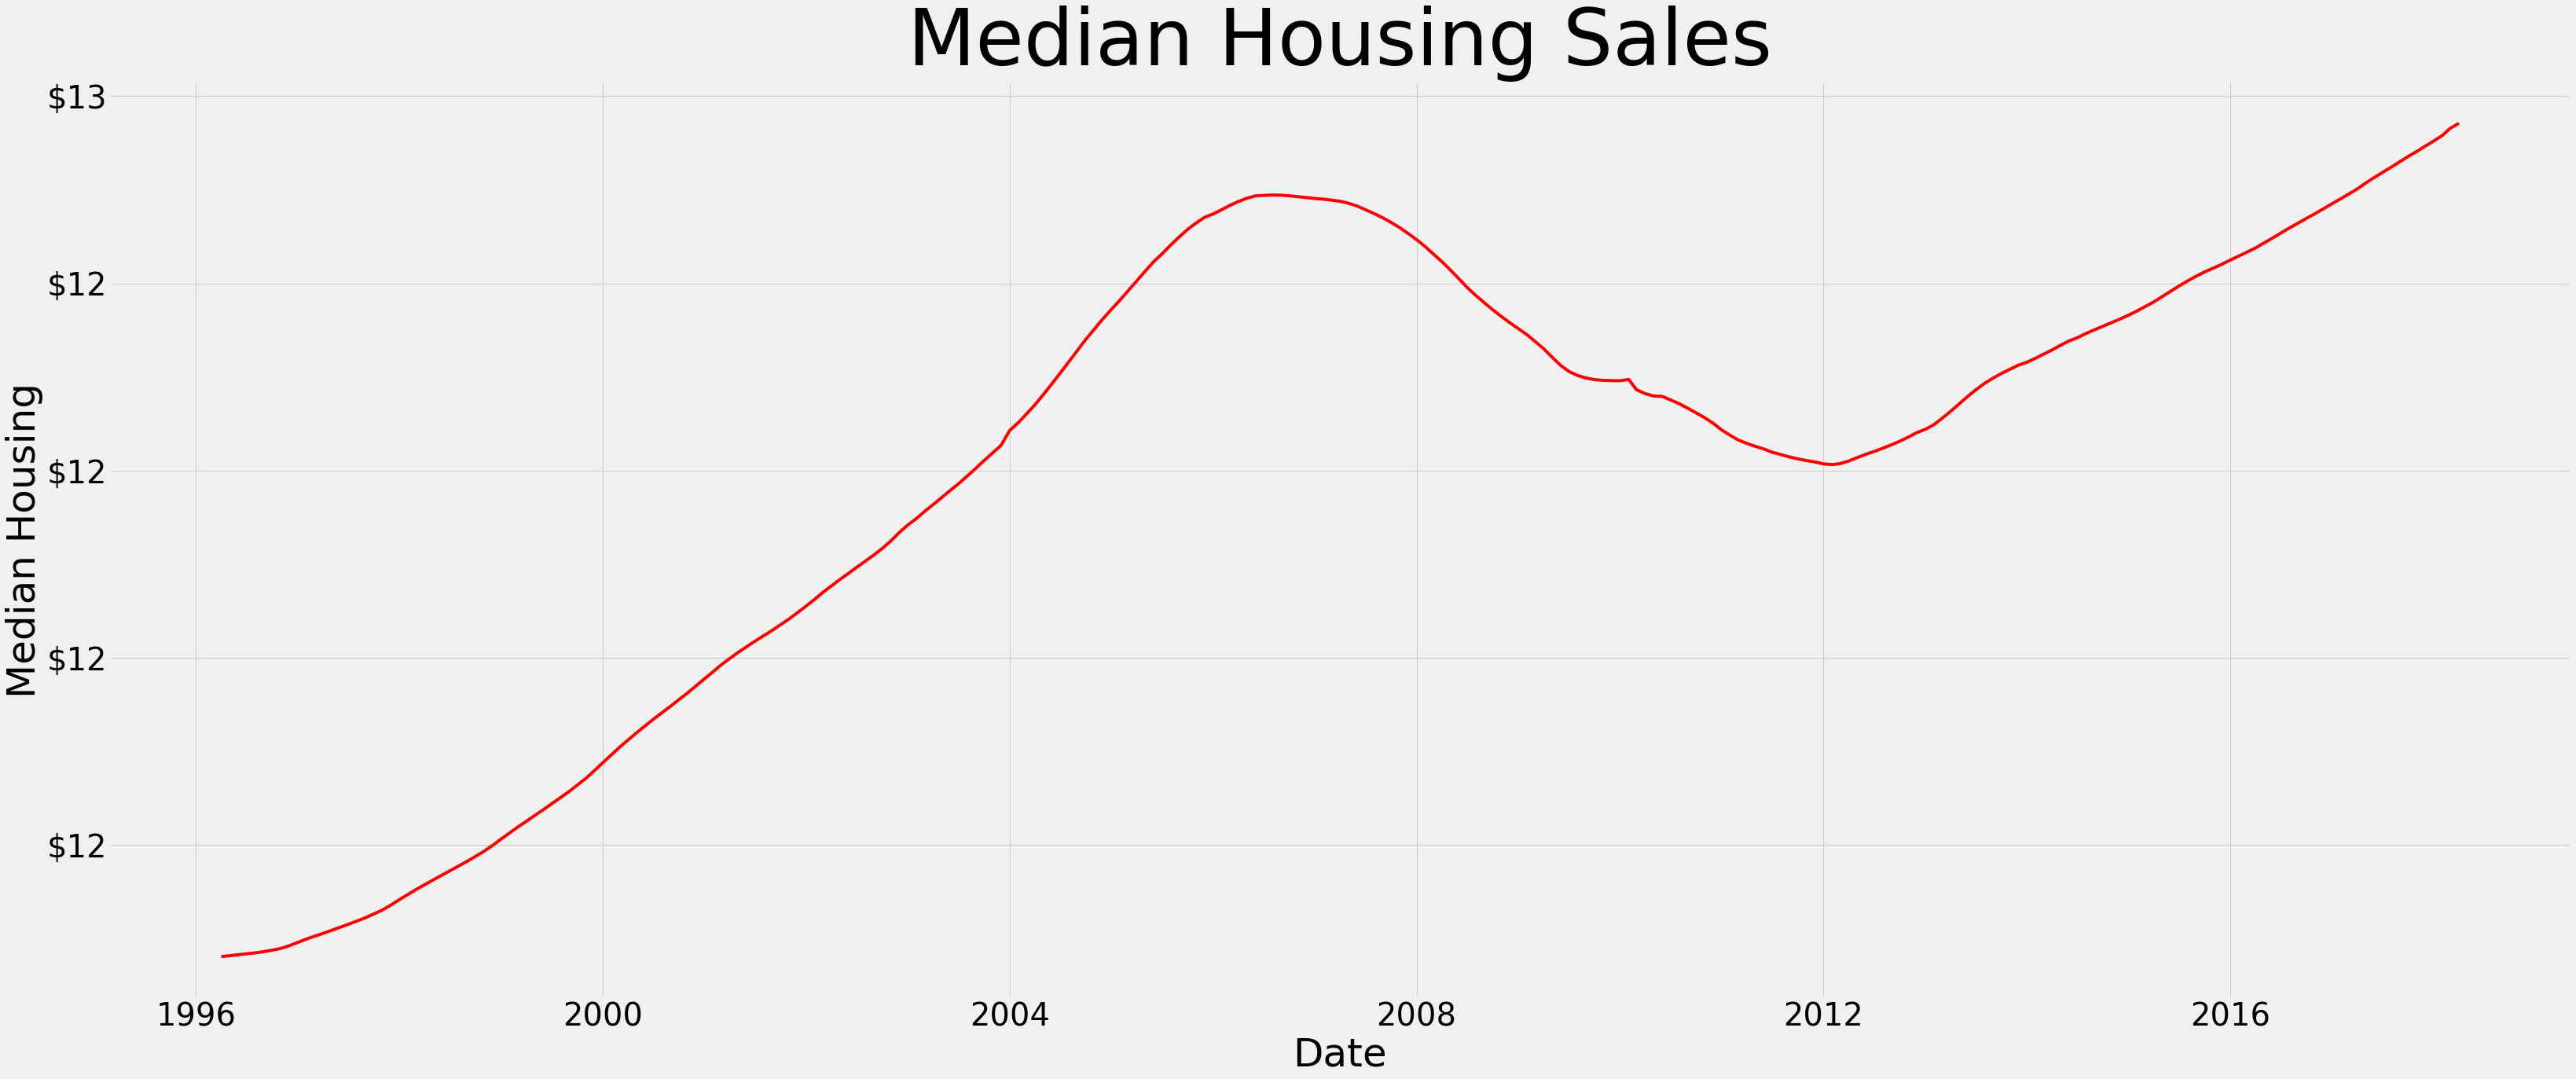

In [44]:
fig, ax = plt.subplots(figsize=(50, 20))
#p = sns.lineplot(data=avg_home_ts, x='time', y='home_value', color='blue');
p = sns.lineplot(data=avg_home_ts_log, x='time', y='home_value', color='red');

p.set_xlabel("Date", fontsize = 50)
p.set_ylabel("Median Housing", fontsize = 50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales", fontsize = 100)
plt.figsize=(50,25)

plt.show();

### Analysis: Taking the Log of the housing values helped detrend the data, but let's check the Dickey Fuller Test to verify.

In [45]:
# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
#dftest = adfuller(data['#Passengers'])
dftest = adfuller(avg_home_ts_log)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                 -2.21
p-value                         0.20
#Lags Used                      2.00
Number of Observations Used   262.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.87
Critical Value (10%)           -2.57
dtype: float64


Analysis: p-value is still greater than .05, so I will continue to de-trend.

### Subtract Rolling Mean

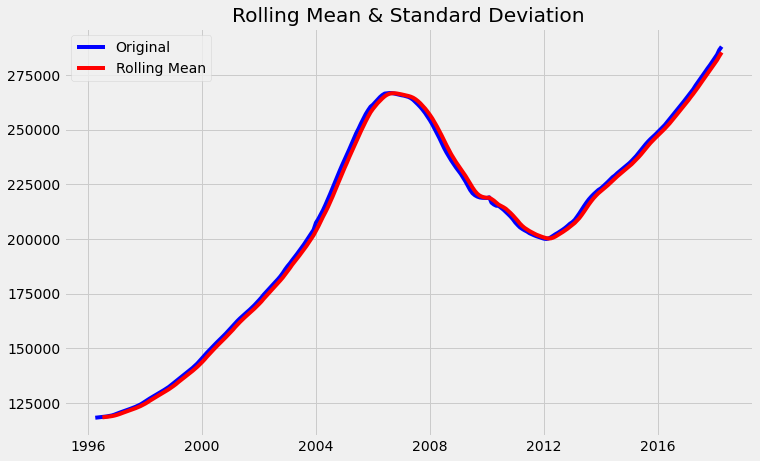

In [46]:
data = avg_home_ts

roll_mean = data.rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [47]:
data_minus_roll_mean = data - roll_mean
data_minus_roll_mean.head(15)

home_value
time                  
1996-04-01         nan
1996-05-01         nan
1996-06-01         nan
1996-07-01      175.90
1996-08-01      182.81
1996-09-01      202.96
1996-10-01      250.18
1996-11-01      301.94
1996-12-01      415.46
1997-01-01      553.21
1997-02-01      620.26
1997-03-01      584.82
1997-04-01      560.60
1997-05-01      564.66
1997-06-01      584.66

In [48]:
data_minus_roll_mean.dropna(inplace=True)

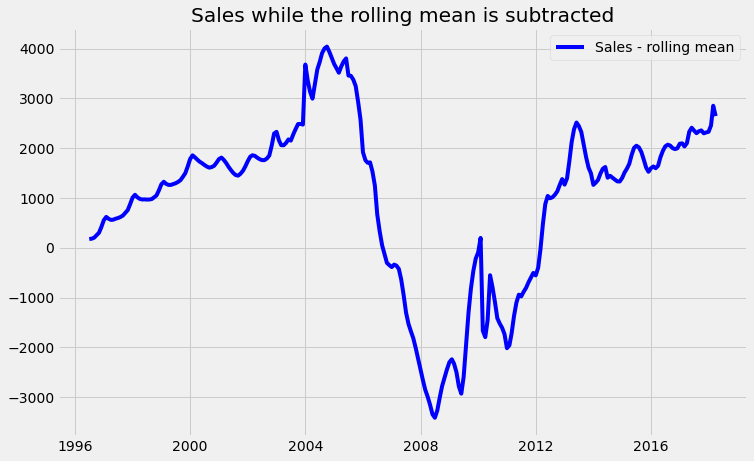

In [49]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

In [50]:
# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
#dftest = adfuller(data['#Passengers'])
dftest = adfuller(data_minus_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                 -2.58
p-value                         0.10
#Lags Used                     12.00
Number of Observations Used   249.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.87
Critical Value (10%)           -2.57
dtype: float64


### Analysis: p-value is .10. Getting Closer!

### Differencing

In [51]:
data_diff = avg_home_ts.diff(periods=1)
data_diff.head(10)

home_value
time                  
1996-04-01         nan
1996-05-01      119.92
1996-06-01      118.38
1996-07-01      115.65
1996-08-01      127.19
1996-09-01      147.27
1996-10-01      192.99
1996-11-01      224.83
1996-12-01      339.73
1997-01-01      436.18

In [52]:
data_diff.dropna(inplace=True)

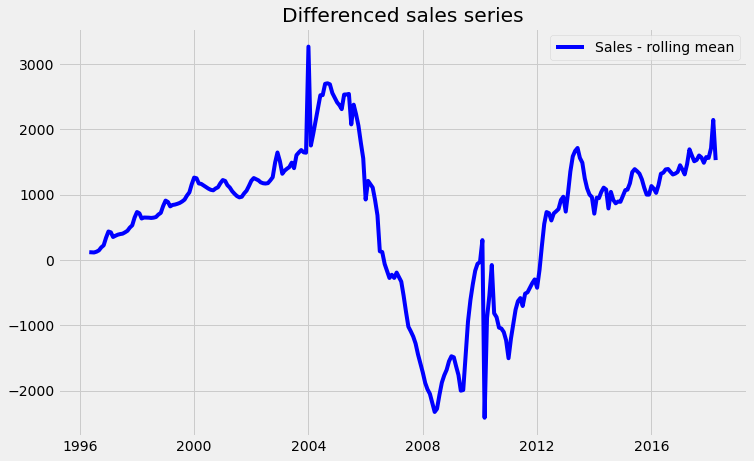

In [53]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [54]:
# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
#dftest = adfuller(data['#Passengers'])
dftest = adfuller(data_diff)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test: 

Test Statistic                 -2.55
p-value                         0.10
#Lags Used                     13.00
Number of Observations Used   250.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.87
Critical Value (10%)           -2.57
dtype: float64


## Feature Engineering

- add: Region Mean, Region Growth, etc
- THE POINT IS TO IDENTIFY WHICH ZIPS ARE THE BEST PERFORMING SO I CAN NARROW DOWN THE DATA TO CAPTURE!!!!

In [55]:
# total_profit = table9.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)
# table9['total_profit'] = total_profit

## Recent Data
- only the data from 2013-2018

In [56]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(48), object(5)
memory usage: 30.6+ MB


In [57]:
#recent_data = ts['2013':]
#recent_data.head()
recent_data = ts.iloc[:, -64:]

In [58]:
recent_data.apply(lambda x: round(x, 2))

2013-01      2013-02      2013-03      2013-04      2013-05  \
0       802,300.00   806,100.00   810,900.00   817,400.00   826,800.00   
1       205,900.00   206,900.00   208,500.00   209,800.00   211,300.00   
2       256,900.00   256,800.00   256,700.00   257,100.00   258,300.00   
3     1,006,300.00 1,013,700.00 1,024,800.00 1,038,300.00 1,053,900.00   
4       113,000.00   113,300.00   113,600.00   113,500.00   113,300.00   
...            ...          ...          ...          ...          ...   
14718   171,800.00   173,800.00   176,800.00   179,700.00   181,500.00   
14719   173,500.00   173,500.00   172,200.00   171,000.00   172,100.00   
14720    98,800.00    99,100.00    99,000.00    98,700.00    99,000.00   
14721   516,200.00   520,300.00   526,900.00   531,200.00   533,700.00   
14722   221,400.00   224,300.00   227,100.00   230,900.00   235,700.00   

           2013-06      2013-07      2013-08      2013-09      2013-10  ...  \
0       837,900.00   848,100.00   853,800.00   856,700.00   856,600.00  ...   
1       214,000.00   217,200.00   220,600.00   223,800.00   226,500.00  ...   
2       260,700.00   263,900.00   267,000.00   269,200.00   271,000.00  ...   
3     1,070,600.00 1,089,900.00 1,108,100.00 1,123,700.00 1,135,100.00  ...   
4       113,000.00   113,000.00   112,900.00   112,800.00   112,500.00  ...   
...            ...          ...          ...          ...          ...  ...   
14718   182,300.00   182,200.00   182,800.00   183,200.00   183,600.00  ...   
14719   174,000.00   175,800.00   177,700.00   179,100.00   179,200.00  ...   
14720   100,300.00   101,300.00   101,700.00   102,700.00   104,100.00  ...   
14721   535,700.00   538,400.00   538,300.00   540,200.00   537,700.00  ...   
14722   241,100.00   245,500.00   249,100.00   252,700.00   256,900.00  ...   

       2017-07  2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  \
0      1005500  1007500  1007800  1009600  1013300  1018700  1024400  1030700   
1       308000   310000   312500   314100   315000   316600   318100   319600   
2       321000   320600   320200   320400   320800   321200   321200   323000   
3      1289800  1287700  1287400  1291500  1296600  1299000  1302700  1306400   
4       119100   119400   120000   120300   120300   120300   120300   120500   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   216800   217700   218600   218500   218100   216400   213100   209800   
14719   202100   208400   212200   215200   214300   213100   213700   218300   
14720   121800   122800   124600   126700   128800   130600   131700   132500   
14721   662800   671200   682400   695600   695500   694700   706400   705300   
14722   333800   336400   339700   343800   346800   348900   350400   353000   

       2018-03  2018-04  
0      1033800  1030600  
1       321100   321800  
2       326900   329900  
3      1308500  1307000  
4       121000   121500  
...        ...      ...  
14718   209200   209300  
14719   222700   225800  
14720   133000   133400  
14721   681500   664400  
14722   356000   357200  

[14723 rows x 64 columns]

In [59]:
recent_data['mean'] = recent_data.apply(lambda x: x.mean(), axis=1)

In [60]:
recent_data['delta'] = recent_data.apply(lambda x: x['2018-04'] - x['2013-01'], axis=1)

In [61]:
recent_data

2013-01      2013-02      2013-03      2013-04      2013-05  \
0       802,300.00   806,100.00   810,900.00   817,400.00   826,800.00   
1       205,900.00   206,900.00   208,500.00   209,800.00   211,300.00   
2       256,900.00   256,800.00   256,700.00   257,100.00   258,300.00   
3     1,006,300.00 1,013,700.00 1,024,800.00 1,038,300.00 1,053,900.00   
4       113,000.00   113,300.00   113,600.00   113,500.00   113,300.00   
...            ...          ...          ...          ...          ...   
14718   171,800.00   173,800.00   176,800.00   179,700.00   181,500.00   
14719   173,500.00   173,500.00   172,200.00   171,000.00   172,100.00   
14720    98,800.00    99,100.00    99,000.00    98,700.00    99,000.00   
14721   516,200.00   520,300.00   526,900.00   531,200.00   533,700.00   
14722   221,400.00   224,300.00   227,100.00   230,900.00   235,700.00   

           2013-06      2013-07      2013-08      2013-09      2013-10  ...  \
0       837,900.00   848,100.00   853,800.00   856,700.00   856,600.00  ...   
1       214,000.00   217,200.00   220,600.00   223,800.00   226,500.00  ...   
2       260,700.00   263,900.00   267,000.00   269,200.00   271,000.00  ...   
3     1,070,600.00 1,089,900.00 1,108,100.00 1,123,700.00 1,135,100.00  ...   
4       113,000.00   113,000.00   112,900.00   112,800.00   112,500.00  ...   
...            ...          ...          ...          ...          ...  ...   
14718   182,300.00   182,200.00   182,800.00   183,200.00   183,600.00  ...   
14719   174,000.00   175,800.00   177,700.00   179,100.00   179,200.00  ...   
14720   100,300.00   101,300.00   101,700.00   102,700.00   104,100.00  ...   
14721   535,700.00   538,400.00   538,300.00   540,200.00   537,700.00  ...   
14722   241,100.00   245,500.00   249,100.00   252,700.00   256,900.00  ...   

       2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  \
0      1007800  1009600  1013300  1018700  1024400  1030700  1033800  1030600   
1       312500   314100   315000   316600   318100   319600   321100   321800   
2       320200   320400   320800   321200   321200   323000   326900   329900   
3      1287400  1291500  1296600  1299000  1302700  1306400  1308500  1307000   
4       120000   120300   120300   120300   120300   120500   121000   121500   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   218600   218500   218100   216400   213100   209800   209200   209300   
14719   212200   215200   214300   213100   213700   218300   222700   225800   
14720   124600   126700   128800   130600   131700   132500   133000   133400   
14721   682400   695600   695500   694700   706400   705300   681500   664400   
14722   339700   343800   346800   348900   350400   353000   356000   357200   

              mean      delta  
0       929,381.25 228,300.00  
1       267,568.75 115,900.00  
2       304,398.44  73,000.00  
3     1,201,653.12 300,700.00  
4       115,440.62   8,500.00  
...            ...        ...  
14718   193,946.88  37,500.00  
14719   188,935.94  52,300.00  
14720   111,531.25  34,600.00  
14721   570,803.12 148,200.00  
14722   295,032.81 135,800.00  

[14723 rows x 66 columns]

## attempting merge

In [62]:
#recent_stats = recent_data.iloc[:, -3:]

In [63]:
new_df = ts.iloc[:, :7]
new_df = new_df.reset_index()

In [64]:
#new_df.drop([:, -1])

In [65]:
recent_data = recent_data.reset_index()

In [66]:
#cs_churn_df = cs_churn_df.merge(variable_1, on='#_of_calls')
new_df = new_df.merge(recent_data, on='index')

In [67]:
new_df.head()

index  RegionID RegionName      City State              Metro CountyName  \
0      0     84654      60657   Chicago    IL            Chicago       Cook   
1      1     90668      75070  McKinney    TX  Dallas-Fort Worth     Collin   
2      2     91982      77494      Katy    TX            Houston     Harris   
3      3     84616      60614   Chicago    IL            Chicago       Cook   
4      4     93144      79936   El Paso    TX            El Paso    El Paso   

   SizeRank      2013-01      2013-02  ...  2017-09  2017-10  2017-11  \
0         1   802,300.00   806,100.00  ...  1007800  1009600  1013300   
1         2   205,900.00   206,900.00  ...   312500   314100   315000   
2         3   256,900.00   256,800.00  ...   320200   320400   320800   
3         4 1,006,300.00 1,013,700.00  ...  1287400  1291500  1296600   
4         5   113,000.00   113,300.00  ...   120000   120300   120300   

   2017-12  2018-01  2018-02  2018-03  2018-04         mean      delta  
0  1018700  1024400  1030700  1033800  1030600   929,381.25 228,300.00  
1   316600   318100   319600   321100   321800   267,568.75 115,900.00  
2   321200   321200   323000   326900   329900   304,398.44  73,000.00  
3  1299000  1302700  1306400  1308500  1307000 1,201,653.12 300,700.00  
4   120300   120300   120500   121000   121500   115,440.62   8,500.00  

[5 rows x 74 columns]

### ASSERT NEEDED: new_df has accurate data, but before turning in this project I should include ASSERT to prove that it is.

# Analysis of New DF w/Metrics

In [68]:
new_df.drop(columns=['index'], inplace=True)

In [69]:
new_df.head()

RegionID RegionName      City State              Metro CountyName  \
0     84654      60657   Chicago    IL            Chicago       Cook   
1     90668      75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982      77494      Katy    TX            Houston     Harris   
3     84616      60614   Chicago    IL            Chicago       Cook   
4     93144      79936   El Paso    TX            El Paso    El Paso   

   SizeRank      2013-01      2013-02      2013-03  ...  2017-09  2017-10  \
0         1   802,300.00   806,100.00   810,900.00  ...  1007800  1009600   
1         2   205,900.00   206,900.00   208,500.00  ...   312500   314100   
2         3   256,900.00   256,800.00   256,700.00  ...   320200   320400   
3         4 1,006,300.00 1,013,700.00 1,024,800.00  ...  1287400  1291500   
4         5   113,000.00   113,300.00   113,600.00  ...   120000   120300   

   2017-11  2017-12  2018-01  2018-02  2018-03  2018-04         mean  \
0  1013300  1018700  1024400  1030700  1033800  1030600   929,381.25   
1   315000   316600   318100   319600   321100   321800   267,568.75   
2   320800   321200   321200   323000   326900   329900   304,398.44   
3  1296600  1299000  1302700  1306400  1308500  1307000 1,201,653.12   
4   120300   120300   120300   120500   121000   121500   115,440.62   

       delta  
0 228,300.00  
1 115,900.00  
2  73,000.00  
3 300,700.00  
4   8,500.00  

[5 rows x 73 columns]

In [70]:
new_df = new_df.sort_values('delta', ascending=False)

In [71]:
new_df['delta_rank'] = range(len(ts))
new_df.head()

RegionID RegionName           City State  \
272       61635      10021       New York    NY   
20        61625      10011       New York    NY   
10237     97518      94027       Atherton    CA   
4816      96086      90210  Beverly Hills    CA   
5738      97691      94301      Palo Alto    CA   

                                Metro   CountyName  SizeRank       2013-01  \
272                          New York     New York       273 11,151,000.00   
20                           New York     New York        21  7,886,000.00   
10237                   San Francisco    San Mateo     10238  3,753,100.00   
4816   Los Angeles-Long Beach-Anaheim  Los Angeles      4817  3,181,200.00   
5738                         San Jose  Santa Clara      5739  2,536,400.00   

            2013-02       2013-03  ...   2017-10   2017-11   2017-12  \
272   11,168,300.00 11,191,400.00  ...  18569400  18428800  18307100   
20     7,814,000.00  7,849,900.00  ...  12050100  12016300  11946500   
10237  3,832,300.00  3,913,100.00  ...   6315400   6429100   6581800   
4816   3,232,900.00  3,301,000.00  ...   5503000   5574100   5661000   
5738   2,577,200.00  2,612,500.00  ...   4401100   4481700   4544700   

        2018-01   2018-02   2018-03   2018-04          mean        delta  \
272    18365900  18530400  18337700  17894900 16,281,670.31 6,743,900.00   
20     11978100  11849300  11563000  11478300 10,555,268.75 3,592,300.00   
10237   6705000   6764600   6788400   6796500  5,228,923.44 3,043,400.00   
4816    5738200   5816100   5907800   5956700  4,501,590.62 2,775,500.00   
5738    4595100   4668700   4762600   4818400  3,590,104.69 2,282,000.00   

       delta_rank  
272             0  
20              1  
10237           2  
4816            3  
5738            4  

[5 rows x 74 columns]

In [72]:
new_df = new_df.sort_values('mean', ascending=False)
new_df['mean_rank'] = range(len(ts))
new_df.head()

RegionID RegionName      City State          Metro CountyName  \
272       61635      10021  New York    NY       New York   New York   
20        61625      10011  New York    NY       New York   New York   
508       61628      10014  New York    NY       New York   New York   
21        61703      10128  New York    NY       New York   New York   
10237     97518      94027  Atherton    CA  San Francisco  San Mateo   

       SizeRank       2013-01       2013-02       2013-03  ...   2017-11  \
272         273 11,151,000.00 11,168,300.00 11,191,400.00  ...  18428800   
20           21  7,886,000.00  7,814,000.00  7,849,900.00  ...  12016300   
508         509  7,177,700.00  7,143,400.00  7,247,200.00  ...   9515800   
21           22  5,378,000.00  5,411,800.00  5,480,100.00  ...   7371400   
10237     10238  3,753,100.00  3,832,300.00  3,913,100.00  ...   6429100   

        2017-12   2018-01   2018-02   2018-03   2018-04          mean  \
272    18307100  18365900  18530400  18337700  17894900 16,281,670.31   
20     11946500  11978100  11849300  11563000  11478300 10,555,268.75   
508     9492800   9524900   9373400   9119600   8959300  9,151,843.75   
21      7342700   7353300   7350300   7363000   7386600  6,953,489.06   
10237   6581800   6705000   6764600   6788400   6796500  5,228,923.44   

             delta  delta_rank  mean_rank  
272   6,743,900.00           0          0  
20    3,592,300.00           1          1  
508   1,781,600.00           9          2  
21    2,008,600.00           6          3  
10237 3,043,400.00           2          4  

[5 rows x 75 columns]

In [73]:
new_df.sort_values("delta_rank").head(1000)

RegionID RegionName                      City State  \
272       61635      10021                  New York    NY   
20        61625      10011                  New York    NY   
10237     97518      94027                  Atherton    CA   
4816      96086      90210             Beverly Hills    CA   
5738      97691      94301                 Palo Alto    CA   
5843      97513      94022                 Los Altos    CA   
21        61703      10128                  New York    NY   
4723      72636      33480                Palm Beach    FL   
1534      62028      11217                  New York    NY   
508       61628      10014                  New York    NY   
2026      97577      94123             San Francisco    CA   
5414      97515      94024                 Los Altos    CA   
3339      97696      94306                 Palo Alto    CA   
7380      96149      90402              Santa Monica    CA   
156       62048      11238                  New York    NY   
1791      97527      94040             Mountain View    CA   
14641     97901      94970             Stinson Beach    CA   
8256      97695      94305                  Stanford    CA   
13864     62320      11975                 Wainscott    NY   
742       97569      94115             San Francisco    CA   
985       96001      90020               Los Angeles    CA   
11977     99524      98039                    Medina    WA   
945       96030      90049               Los Angeles    CA   
7596      93816      81611                     Aspen    CO   
6528      96088      90212             Beverly Hills    CA   
11728     62281      11930                Amagansett    NY   
1995      62041      11231                  New York    NY   
2054      97693      94303                 Palo Alto    CA   
5261      96116      90265                    Malibu    CA   
10008     97519      94028            Portola Valley    CA   
1896      96050      90069            West Hollywood    CA   
4528      96120      90272               Los Angeles    CA   
8697      96058      90077               Los Angeles    CA   
3208      97966      95070                  Saratoga    CA   
1265      97501      94010                Burlingame    CA   
516       97549      94087                 Sunnyvale    CA   
84        72442      33139               Miami Beach    FL   
2721      97587      94133             San Francisco    CA   
2070      96150      90403              Santa Monica    CA   
896       97571      94117             San Francisco    CA   
2580      97530      94043             Mountain View    CA   
11172     62321      11976                Water Mill    NY   
1643      97516      94025                Menlo Park    CA   
461       97926      95014                 Cupertino    CA   
6345      97528      94041             Mountain View    CA   
1125      99492      98004                  Bellevue    WA   
7362      97936      95030                 Los Gatos    CA   
12614     62283      11932             Bridgehampton    NY   
8593      96087      90211             Beverly Hills    CA   
754       96005      90024               Los Angeles    CA   
2010      96117      90266           Manhattan Beach    CA   
9         97564      94109             San Francisco    CA   
7827      97130      93108                 Montecito    CA   
582       97548      94086                 Sunnyvale    CA   
1790      96127      90291               Los Angeles    CA   
8134      96975      92657             Newport Coast    CA   
6391      72452      33149              Key Biscayne    FL   
6945      97865      94920                   Tiburon    CA   
6384      96957      92625             Newport Beach    CA   
1107      97572      94118             San Francisco    CA   
9956      96979      92661             Newport Beach    CA   
106       62026      11215                  New York    NY   
2127      97997      95129                  San Jose    CA   
1888      96128      90292             

# NEXT FEATURE = ADD DELTA AS A PERCENTAGE OF VALUE (IE, HOME VALUES INCREASED X%)

In [74]:
new_df['delta_percent'] = new_df.apply(lambda x: x['delta'] / x['2013-01'], axis=1)

In [75]:
#this seems to correct the percentages
#new_df['delta_percent'] = new_df['delta_percent'].diff() / new_df['delta_percent'].abs().shift()

In [76]:
new_df.head()

RegionID RegionName      City State          Metro CountyName  \
272       61635      10021  New York    NY       New York   New York   
20        61625      10011  New York    NY       New York   New York   
508       61628      10014  New York    NY       New York   New York   
21        61703      10128  New York    NY       New York   New York   
10237     97518      94027  Atherton    CA  San Francisco  San Mateo   

       SizeRank       2013-01       2013-02       2013-03  ...   2017-12  \
272         273 11,151,000.00 11,168,300.00 11,191,400.00  ...  18307100   
20           21  7,886,000.00  7,814,000.00  7,849,900.00  ...  11946500   
508         509  7,177,700.00  7,143,400.00  7,247,200.00  ...   9492800   
21           22  5,378,000.00  5,411,800.00  5,480,100.00  ...   7342700   
10237     10238  3,753,100.00  3,832,300.00  3,913,100.00  ...   6581800   

        2018-01   2018-02   2018-03   2018-04          mean        delta  \
272    18365900  18530400  18337700  17894900 16,281,670.31 6,743,900.00   
20     11978100  11849300  11563000  11478300 10,555,268.75 3,592,300.00   
508     9524900   9373400   9119600   8959300  9,151,843.75 1,781,600.00   
21      7353300   7350300   7363000   7386600  6,953,489.06 2,008,600.00   
10237   6705000   6764600   6788400   6796500  5,228,923.44 3,043,400.00   

       delta_rank  mean_rank  delta_percent  
272             0          0           0.60  
20              1          1           0.46  
508             9          2           0.25  
21              6          3           0.37  
10237           2          4           0.81  

[5 rows x 76 columns]

In [77]:
new_df.sort_values('delta_percent', ascending=False).head(100)

RegionID RegionName                City State  \
1477      97803      94601             Oakland    CA   
7302      93292      80216              Denver    CO   
1239      97795      94590             Vallejo    CA   
2627      72619      33460          Lake Worth    FL   
2661      72768      33705    Saint Petersburg    FL   
5830      79095      48240             Redford    MI   
6105      74241      37210           Nashville    TN   
1758      71036      30316             Atlanta    GA   
1273      72601      33435       Boynton Beach    FL   
4298      98433      95824          Sacramento    CA   
2988      72233      32807             Orlando    FL   
1946      94751      85035             Phoenix    AZ   
1461      72620      33461        Palm Springs    FL   
990       72582      33415          Greenacres    FL   
2409      72571      33404       Riviera Beach    FL   
1463      73031      34207           Bradenton    FL   
2266      70977      30238           Jonesboro    GA   
1853      97850      94804            Richmond    CA   
6563      63932      15201          Pittsburgh    PA   
6315      72719      33616               Tampa    FL   
1835      74238      37207           Nashville    TN   
5799      79043      48184               Wayne    MI   
1681      97808      94606             Oakland    CA   
3794      72388      33056       Miami Gardens    FL   
1960      95800      89104           Las Vegas    NV   
475       62027      11216            New York    NY   
7354      97851      94805            Richmond    CA   
838       72428      33125               Miami    FL   
1202      70819      30034       Panthersville    GA   
907       72371      33033           Homestead    FL   
4146      72368      33030           Homestead    FL   
4516      97794      94589             Vallejo    CA   
433       95806      89110           Las Vegas    NV   
2869      72387      33055       Miami Gardens    FL   
2782      79092      48237            Oak Park    MI   
1962      79094      48239             Redford    MI   
2439      72776      33713    Saint Petersburg    FL   
1959      72438      33135               Miami    FL   
2068      72370      33032           Princeton    FL   
763       72717      33614     Egypt Lake-Leto    FL   
1233      72464      33161         North Miami    FL   
2155      93281      80204              Denver    CO   
7817      97297      93505     California City    CA   
3973      73243      34982         Fort Pierce    FL   
132       72347      33009          Hallandale    FL   
2934      95803      89107           Las Vegas    NV   
815       95811      89115           Las Vegas    NV   
2060      95909      89431              Sparks    NV   
7482      98301      95605     West Sacramento    CA   
2458      72465      33162   North Miami Beach    FL   
3133      72576      33409     West Palm Beach    FL   
3188      72293      32905            Palm Bay    FL   
257       72393      33064       Pompano Beach    FL   
1154      72397      33068    North Lauderdale    FL   
2470      93200      80010              Aurora    CO   
2828      72398      33069       Pompano Beach    FL   
6758      87103      66103         Kansas City    KS   
4436      72923      33936        Lehigh Acres    FL   
1379      97807      94605             Oakland    CA   
1284      79055      48198            Superior    MI   
803       72358      33020           Hollywood    FL   
2065      73029      34205           Bradenton    FL   
3832      72764      33701    Saint Petersburg    FL   
3505      97537      94063        Redwood City    CA   
12134     98061      95231         French Camp    CA   
585       72262      32839             Orlando    FL   
6355      98048      95215        Garden Acres    CA   
287       72532      33313          Lauderhill    FL   
822       95931      89502                Reno    NV   
7221      72570      33403           Lake Park    FL   
2775      98429      95820     

In [78]:
new_df['delta'].isna().sum()

151

In [79]:
#new_df.describe()

In [80]:
new_df.sort_values('delta', ascending=False).head()

RegionID RegionName           City State  \
272       61635      10021       New York    NY   
20        61625      10011       New York    NY   
10237     97518      94027       Atherton    CA   
4816      96086      90210  Beverly Hills    CA   
5738      97691      94301      Palo Alto    CA   

                                Metro   CountyName  SizeRank       2013-01  \
272                          New York     New York       273 11,151,000.00   
20                           New York     New York        21  7,886,000.00   
10237                   San Francisco    San Mateo     10238  3,753,100.00   
4816   Los Angeles-Long Beach-Anaheim  Los Angeles      4817  3,181,200.00   
5738                         San Jose  Santa Clara      5739  2,536,400.00   

            2013-02       2013-03  ...   2017-12   2018-01   2018-02  \
272   11,168,300.00 11,191,400.00  ...  18307100  18365900  18530400   
20     7,814,000.00  7,849,900.00  ...  11946500  11978100  11849300   
10237  3,832,300.00  3,913,100.00  ...   6581800   6705000   6764600   
4816   3,232,900.00  3,301,000.00  ...   5661000   5738200   5816100   
5738   2,577,200.00  2,612,500.00  ...   4544700   4595100   4668700   

        2018-03   2018-04          mean        delta  delta_rank  mean_rank  \
272    18337700  17894900 16,281,670.31 6,743,900.00           0          0   
20     11563000  11478300 10,555,268.75 3,592,300.00           1          1   
10237   6788400   6796500  5,228,923.44 3,043,400.00           2          4   
4816    5907800   5956700  4,501,590.62 2,775,500.00           3          5   
5738    4762600   4818400  3,590,104.69 2,282,000.00           4         10   

       delta_percent  
272             0.60  
20              0.46  
10237           0.81  
4816            0.87  
5738            0.90  

[5 rows x 76 columns]

# Creating Analysis_DF

In [81]:
new_df.head(2)

RegionID RegionName      City State     Metro CountyName  SizeRank  \
272     61635      10021  New York    NY  New York   New York       273   
20      61625      10011  New York    NY  New York   New York        21   

          2013-01       2013-02       2013-03  ...   2017-12   2018-01  \
272 11,151,000.00 11,168,300.00 11,191,400.00  ...  18307100  18365900   
20   7,886,000.00  7,814,000.00  7,849,900.00  ...  11946500  11978100   

      2018-02   2018-03   2018-04          mean        delta  delta_rank  \
272  18530400  18337700  17894900 16,281,670.31 6,743,900.00           0   
20   11849300  11563000  11478300 10,555,268.75 3,592,300.00           1   

     mean_rank  delta_percent  
272          0           0.60  
20           1           0.46  

[2 rows x 76 columns]

## Boston Values = Test of FillNa results

In [82]:
new_df.sort_values('delta_percent', ascending=False).head()

RegionID RegionName              City State                  Metro  \
1477     97803      94601           Oakland    CA          San Francisco   
7302     93292      80216            Denver    CO                 Denver   
1239     97795      94590           Vallejo    CA                Vallejo   
2627     72619      33460        Lake Worth    FL  Miami-Fort Lauderdale   
2661     72768      33705  Saint Petersburg    FL                  Tampa   

      CountyName  SizeRank    2013-01    2013-02    2013-03  ...  2017-12  \
1477     Alameda      1478 193,700.00 197,200.00 203,200.00  ...   535800   
7302      Denver      7303  91,800.00  93,300.00  95,000.00  ...   251200   
1239      Solano      1240 135,100.00 139,000.00 142,100.00  ...   357100   
2627  Palm Beach      2628  77,600.00  79,800.00  82,300.00  ...   206000   
2661    Pinellas      2662  65,000.00  65,800.00  67,000.00  ...   167100   

      2018-01  2018-02  2018-03  2018-04       mean      delta  delta_rank  \
1477   546900   555000   562000   566700 376,948.44 373,000.00         354   
7302   253800   258100   263700   267300 174,928.12 175,500.00        1374   
1239   362500   366900   371600   376100 253,175.00 241,000.00         760   
2627   209600   211600   213300   215600 143,490.62 138,000.00        2064   
2661   168200   171100   175100   177300 109,917.19 112,300.00        2731   

      mean_rank  delta_percent  
1477       2138           1.93  
7302       7099           1.91  
1239       4169           1.78  
2627       9043           1.78  
2661      11387           1.73  

[5 rows x 76 columns]

In [83]:
new_df.sort_values('City', ascending=True).head(1500)

RegionID RegionName                            City State  \
4357      88633      70510                       Abbeville    LA   
7619      75403      39730                        Aberdeen    MS   
7077      69850      28315                        Aberdeen    NC   
12948     94053      83210                        Aberdeen    ID   
5028      99840      98520                        Aberdeen    WA   
4196      66718      21001                        Aberdeen    MD   
8222      87565      67410                         Abilene    KS   
3666      93025      79606                         Abilene    TX   
5032      93022      79603                         Abilene    TX   
5438      93020      79601                         Abilene    TX   
2987      93024      79605                         Abilene    TX   
4807      93021      79602                         Abilene    TX   
6047      68040      24210                        Abingdon    VA   
3102      66720      21009                        Abingdon    MD   
8340      68041      24211                        Abingdon    VA   
11683     84949      61410                        Abingdon    IL   
6534      58737      02351                        Abington    MA   
6592      65684      19001                        Abington    PA   
5546      65724      19046                        Abington    PA   
9196      65765      19095                        Abington    PA   
3247      65718      19038                        Abington    PA   
8908      88581      70420                   Abita Springs    LA   
8077      60999      08201                         Absecon    NJ   
9983      98050      95220                          Acampo    CA   
13578     66890      21520                        Accident    MD   
8239      66499      20607                        Accokeek    MD   
11339     75404      39735                        Ackerman    MS   
9419      97298      93510                           Acton    CA   
5167      58465      01720                           Acton    MA   
8484      58883      02743                        Acushnet    MA   
1840      70879      30102                         Acworth    GA   
495       70878      30101                         Acworth    GA   
2770      90533      74820                             Ada    OK   
12856     90349      74330                           Adair    OK   
7042      70880      30103                     Adairsville    GA   
11159     74098      37010                           Adams    TN   
11291     63169      13605                           Adams    NY   
8527      58294      01220                           Adams    MA   
13065     63170      13606                    Adams Center    NY   
11597     66992      21710                       Adamstown    MD   
9891      74748      38310                      Adamsville    TN   
9269      73258      35005                      Adamsville    AL   
10028     88746      70710                           Addis    LA   
2680      84355      60101                         Addison    IL   
4661      90611      75001                         Addison    TX   
13520     81133      53002                         Addison    WI   
10733     63736      14801                         Addison    NY   
9256      80070      50003                            Adel    IA   
4525      96788      92301                        Adelanto    CA   
11788     86558      64720                          Adrian    MO   
6833      69164      27006                         Advance    NC   
11980     86156      63730                         Advance    MO   
314       85941      63123                          Affton    MO   
12463     63254      13730                           Afton    NY   
12799     82028      55001                           Afton    MN   
7801      58216      01030                          Agawam    MA   
5850      58196      01001                          Agawam    MA   
4766      96336      91301                    Agoura Hills    C

In [84]:
boston = new_df[new_df['City'] == 'Boston']
boston

RegionID RegionName    City State        Metro CountyName  SizeRank  \
3330      58630      02116  Boston    MA       Boston    Suffolk      3331   
1670      58644      02130  Boston    MA       Boston    Suffolk      1671   
1511      58641      02127  Boston    MA       Boston    Suffolk      1512   
4520      58648      02134  Boston    MA       Boston    Suffolk      4521   
561       58649      02135  Boston    MA       Boston    Suffolk       562   
12041     58624      02110  Boston    MA       Boston    Suffolk     12042   
7500      58634      02120  Boston    MA       Boston    Suffolk      7501   
3576      58646      02132  Boston    MA       Boston    Suffolk      3577   
3373      58645      02131  Boston    MA       Boston    Suffolk      3374   
8142      58625      02111  Boston    MA       Boston    Suffolk      8143   
5125      58636      02122  Boston    MA       Boston    Suffolk      5126   
3038      58639      02125  Boston    MA       Boston    Suffolk      3039   
1169      58638      02124  Boston    MA       Boston    Suffolk      1170   
1921      58642      02128  Boston    MA       Boston    Suffolk      1922   
3669      58633      02119  Boston    MA       Boston    Suffolk      3670   
2904      58650      02136  Boston    MA       Boston    Suffolk      2905   
4860      58635      02121  Boston    MA       Boston    Suffolk      4861   
5305      58640      02126  Boston    MA       Boston    Suffolk      5306   
14490     67360      22713  Boston    VA   Washington   Culpeper     14491   
12588     63365      14025  Boston    NY      Buffalo       Erie     12589   
13356     75522      40107  Boston    KY    Bardstown     Nelson     13357   
11954     71600      31626  Boston    GA  Thomasville     Thomas     11955   

         2013-01    2013-02    2013-03  ...  2017-12  2018-01  2018-02  \
3330         nan        nan        nan  ...  2064500  2037600  2056900   
1670  561,800.00 566,000.00 571,100.00  ...   853800   857600   866700   
1511  428,000.00 429,600.00 431,800.00  ...   759100   764900   776600   
4520  425,200.00 429,400.00 430,600.00  ...   763600   771400   780000   
561   438,400.00 440,700.00 443,900.00  ...   717500   722600   728500   
12041 432,900.00 434,100.00 430,100.00  ...   691300   724900   746800   
7500  342,100.00 348,700.00 353,300.00  ...   696200   697000   704500   
3576  401,400.00 404,000.00 406,000.00  ...   597800   598000   602300   
3373  346,300.00 347,100.00 349,200.00  ...   544600   546900   552400   
8142  328,900.00 332,500.00 333,900.00  ...   557800   571200   578500   
5125  320,700.00 320,900.00 323,000.00  ...   516700   516500   519800   
3038  288,900.00 291,600.00 294,100.00  ...   536700   539300   543900   
1169  314,700.00 316,200.00 318,900.00  ...   509800   516000   523000   
1921  268,300.00 271,200.00 273,400.00  ...   467400   467200   471400   
3669  250,400.00 251,700.00 252,000.00  ...   489200   487900   493300   
2904  277,500.00 279,200.00 282,000.00  ...   419400   420700   423500   
4860  243,800.00 247,200.00 251,200.00  ...   451600   452200   450200   
5305  236,900.00 238,500.00 241,400.00  ...   391400   395700   401100   
14490 218,300.00 221,300.00 222,600.00  ...   273700   273000   272600   
12588 150,400.00 150,300.00 150,800.00  ...   176100   177800   180100   
13356  98,300.00  98,000.00  97,900.00  ...   135200   135800   138000   
11954  67,500.00  67,700.00  67,500.00  ...    85000    85900    86300   

       2018-03  2018-04         mean      delta  delta_rank  mean_rank  \
3330   2106500  2136500 1,887,043.48        nan       14582         70   
1670    882600   892300   715,867.19 330,500.00         440        600   
1511    795000   807900   590,267.19 379,900.00         340        903   
4520    785900   788000   586,450.00 362,800.00         368        914   
561     735400   738000   581,001.56 299,600.00         526        930   
12041   736800   724900   551,109.38 292,000.00         546      

In [85]:
boston.iloc[0]

RegionID               58630
RegionName             02116
City                  Boston
State                     MA
Metro                 Boston
CountyName           Suffolk
SizeRank                3331
2013-01                  NaN
2013-02                  NaN
2013-03                  NaN
2013-04                  NaN
2013-05                  NaN
2013-06                  NaN
2013-07                  NaN
2013-08                  NaN
2013-09                  NaN
2013-10                  NaN
2013-11                  NaN
2013-12                  NaN
2014-01                  NaN
2014-02                  NaN
2014-03                  NaN
2014-04                  NaN
2014-05                  NaN
2014-06                  NaN
2014-07              1745500
2014-08              1682000
2014-09              1605800
2014-10              1610900
2014-11              1642900
2014-12              1675100
2015-01              1713200
2015-02              1723300
2015-03              1696900
2015-04       

In [86]:
new_df.iloc[:, -6:]

2018-04          mean        delta  delta_rank  mean_rank  \
272    17894900 16,281,670.31 6,743,900.00           0          0   
20     11478300 10,555,268.75 3,592,300.00           1          1   
508     8959300  9,151,843.75 1,781,600.00           9          2   
21      7386600  6,953,489.06 2,008,600.00           6          3   
10237   6796500  5,228,923.44 3,043,400.00           2          4   
...         ...           ...          ...         ...        ...   
4360      28900     20,846.88     5,900.00       13797      14718   
11917     22200     18,698.44     5,200.00       13881      14719   
4149      21500     18,506.25     3,700.00       14023      14720   
4381      22800     17,182.81     6,000.00       13791      14721   
12584     13800     14,476.56    -2,100.00       14380      14722   

       delta_percent  
272             0.60  
20              0.46  
508             0.25  
21              0.37  
10237           0.81  
...              ...  
4360            0.26  
11917           0.31  
4149            0.21  
4381            0.36  
12584          -0.13  

[14723 rows x 6 columns]

In [87]:
analysis_df_5 = new_df.iloc[:, :8]
analysis_df_5.head()

RegionID RegionName      City State          Metro CountyName  \
272       61635      10021  New York    NY       New York   New York   
20        61625      10011  New York    NY       New York   New York   
508       61628      10014  New York    NY       New York   New York   
21        61703      10128  New York    NY       New York   New York   
10237     97518      94027  Atherton    CA  San Francisco  San Mateo   

       SizeRank       2013-01  
272         273 11,151,000.00  
20           21  7,886,000.00  
508         509  7,177,700.00  
21           22  5,378,000.00  
10237     10238  3,753,100.00

In [88]:
analysis_stats = new_df.iloc[:, -6:]
analysis_stats.head()

2018-04          mean        delta  delta_rank  mean_rank  \
272    17894900 16,281,670.31 6,743,900.00           0          0   
20     11478300 10,555,268.75 3,592,300.00           1          1   
508     8959300  9,151,843.75 1,781,600.00           9          2   
21      7386600  6,953,489.06 2,008,600.00           6          3   
10237   6796500  5,228,923.44 3,043,400.00           2          4   

       delta_percent  
272             0.60  
20              0.46  
508             0.25  
21              0.37  
10237           0.81

In [89]:
analysis_df_5 = analysis_df_5.reset_index()
analysis_df_5

index  RegionID RegionName      City State          Metro  CountyName  \
0        272     61635      10021  New York    NY       New York    New York   
1         20     61625      10011  New York    NY       New York    New York   
2        508     61628      10014  New York    NY       New York    New York   
3         21     61703      10128  New York    NY       New York    New York   
4      10237     97518      94027  Atherton    CA  San Francisco   San Mateo   
...      ...       ...        ...       ...   ...            ...         ...   
14718   4360     77649      45406    Dayton    OH         Dayton  Montgomery   
14719  11917     86105      63556     Milan    MO       no_metro    Sullivan   
14720   4149     79247      48506     Flint    MI          Flint     Genesee   
14721   4381     79244      48503     Flint    MI          Flint     Genesee   
14722  12584     89482      72331     Earle    AR        Memphis  Crittenden   

       SizeRank       2013-01  
0           273 11,151,000.00  
1            21  7,886,000.00  
2           509  7,177,700.00  
3            22  5,378,000.00  
4         10238  3,753,100.00  
...         ...           ...  
14718      4361     23,000.00  
14719     11918     17,000.00  
14720      4150     17,800.00  
14721      4382     16,800.00  
14722     12585     15,900.00  

[14723 rows x 9 columns]

In [90]:
analysis_stats = analysis_stats.reset_index()
analysis_stats.head(2)

index   2018-04          mean        delta  delta_rank  mean_rank  \
0    272  17894900 16,281,670.31 6,743,900.00           0          0   
1     20  11478300 10,555,268.75 3,592,300.00           1          1   

   delta_percent  
0           0.60  
1           0.46

In [91]:
analysis_df_5 = analysis_df_5.merge(analysis_stats, on='index')
analysis_df_5.head(2)

index  RegionID RegionName      City State     Metro CountyName  SizeRank  \
0    272     61635      10021  New York    NY  New York   New York       273   
1     20     61625      10011  New York    NY  New York   New York        21   

        2013-01   2018-04          mean        delta  delta_rank  mean_rank  \
0 11,151,000.00  17894900 16,281,670.31 6,743,900.00           0          0   
1  7,886,000.00  11478300 10,555,268.75 3,592,300.00           1          1   

   delta_percent  
0           0.60  
1           0.46

In [92]:
analysis_df_5.drop(columns=['index'], inplace=True)

## Analysis

In [93]:
analysis_df_5.iloc[116]

RegionID                 97498
RegionName               94002
City                   Belmont
State                       CA
Metro            San Francisco
CountyName           San Mateo
SizeRank                  3602
2013-01             964,300.00
2018-04                1815600
mean              1,422,131.25
delta               851,300.00
delta_rank                  88
mean_rank                  116
delta_percent             0.88
Name: 116, dtype: object

In [94]:
analysis_df_5.drop(columns='RegionID', inplace=True)

### Droping NaNs

Using Fillna()with Means may be distorting these results for a few areas.

In [95]:
analysis_df_5.dropna(inplace=True)

# Top 20 Zips (based on RECENT historical data)

In [96]:
#Top 20 Zips by percent increase.
analysis_df_5.sort_values('delta_percent', ascending=False).head(100)                                                            

RegionName                City State                           Metro  \
2138       94601             Oakland    CA                   San Francisco   
7099       80216              Denver    CO                          Denver   
4169       94590             Vallejo    CA                         Vallejo   
9043       33460          Lake Worth    FL           Miami-Fort Lauderdale   
11387      33705    Saint Petersburg    FL                           Tampa   
14481      48240             Redford    MI                         Detroit   
9193       37210           Nashville    TN                       Nashville   
6285       30316             Atlanta    GA                         Atlanta   
8870       33435       Boynton Beach    FL           Miami-Fort Lauderdale   
7902       95824          Sacramento    CA                      Sacramento   
10570      32807             Orlando    FL                         Orlando   
11245      85035             Phoenix    AZ                         Phoenix   
9625       33461        Palm Springs    FL           Miami-Fort Lauderdale   
9881       33415          Greenacres    FL           Miami-Fort Lauderdale   
12730      33404       Riviera Beach    FL           Miami-Fort Lauderdale   
11667      34207           Bradenton    FL   North Port-Sarasota-Bradenton   
13790      30238           Jonesboro    GA                         Atlanta   
2527       94804            Richmond    CA                   San Francisco   
10772      15201          Pittsburgh    PA                      Pittsburgh   
8587       33616               Tampa    FL                           Tampa   
10023      37207           Nashville    TN                       Nashville   
14203      48184               Wayne    MI                         Detroit   
1458       94606             Oakland    CA                   San Francisco   
8501       33056       Miami Gardens    FL           Miami-Fort Lauderdale   
9161       89104           Las Vegas    NV                       Las Vegas   
197        11216            New York    NY                        New York   
1699       94805            Richmond    CA                   San Francisco   
6015       33125               Miami    FL           Miami-Fort Lauderdale   
12782      30034       Panthersville    GA                         Atlanta   
8606       33033           Homestead    FL           Miami-Fort Lauderdale   
8975       33030           Homestead    FL           Miami-Fort Lauderdale   
3760       94589             Vallejo    CA                         Vallejo   
9495       89110           Las Vegas    NV                       Las Vegas   
7381       33055       Miami Gardens    FL           Miami-Fort Lauderdale   
12806      48237            Oak Park    MI                         Detroit   
13951      48239             Redford    MI                         Detroit   
10779      33713    Saint Petersburg    FL                           Tampa   
4713       33135               Miami    FL           Miami-Fort Lauderdale   
7631       33032           Princeton    FL           Miami-Fort Lauderdale   
10506      33614     Egypt Lake-Leto    FL                           Tampa   
6308       33161         North Miami    FL           Miami-Fort Lauderdale   
4300       80204              Denver    CO                          Denver   
12419      93505     California City    CA                     Bakersfield   
11946      34982         Fort Pierce    FL                  Port St. Lucie   
7474       33009          Hallandale    FL           Miami-Fort Lauderdale   
9432       89107           Las Vegas    NV                       Las Vegas   
10498      89115           Las Vegas    NV                       Las Vegas   
6954       89431              Sparks    NV                            Reno   
6291       95605     West Sacramento    CA                      Sacramento   
7281       33162   North Miami Beach    FL           Miami-Fort Lauderdale   
9610       33409     West Pa

In [97]:
#Top 20 by Mean Home Values
analysis_df_5.sort_values('mean', ascending=False).head(10)  

RegionName           City State                           Metro  \
0      10021       New York    NY                        New York   
1      10011       New York    NY                        New York   
2      10014       New York    NY                        New York   
3      10128       New York    NY                        New York   
4      94027       Atherton    CA                   San Francisco   
5      90210  Beverly Hills    CA  Los Angeles-Long Beach-Anaheim   
6      94123  San Francisco    CA                   San Francisco   
7      81611          Aspen    CO                Glenwood Springs   
8      33480     Palm Beach    FL           Miami-Fort Lauderdale   
9      94115  San Francisco    CA                   San Francisco   

      CountyName  SizeRank       2013-01   2018-04          mean        delta  \
0       New York       273 11,151,000.00  17894900 16,281,670.31 6,743,900.00   
1       New York        21  7,886,000.00  11478300 10,555,268.75 3,592,300.00   
2       New York       509  7,177,700.00   8959300  9,151,843.75 1,781,600.00   
3       New York        22  5,378,000.00   7386600  6,953,489.06 2,008,600.00   
4      San Mateo     10238  3,753,100.00   6796500  5,228,923.44 3,043,400.00   
5    Los Angeles      4817  3,181,200.00   5956700  4,501,590.62 2,775,500.00   
6  San Francisco      2027  3,000,300.00   4682300  4,030,057.81 1,682,000.00   
7         Pitkin      7597  3,417,300.00   4766600  3,899,364.06 1,349,300.00   
8     Palm Beach      4724  2,795,900.00   4686200  3,805,860.94 1,890,300.00   
9  San Francisco       743  2,747,500.00   4160500  3,622,190.62 1,413,000.00   

   delta_rank  mean_rank  delta_percent  
0           0          0           0.60  
1           1          1           0.46  
2           9          2           0.25  
3           6          3           0.37  
4           2          4           0.81  
5           3          5           0.87  
6          10          6           0.56  
7          23          7           0.39  
8           7          8           0.68  
9          19          9           0.51

In [98]:
#Top 20 by delta 
analysis_df_5.sort_values('delta', ascending=False).head(10)  

RegionName           City State                           Metro  \
0       10021       New York    NY                        New York   
1       10011       New York    NY                        New York   
4       94027       Atherton    CA                   San Francisco   
5       90210  Beverly Hills    CA  Los Angeles-Long Beach-Anaheim   
10      94301      Palo Alto    CA                        San Jose   
13      94022      Los Altos    CA                        San Jose   
3       10128       New York    NY                        New York   
8       33480     Palm Beach    FL           Miami-Fort Lauderdale   
19      11217       New York    NY                        New York   
2       10014       New York    NY                        New York   

     CountyName  SizeRank       2013-01   2018-04          mean        delta  \
0      New York       273 11,151,000.00  17894900 16,281,670.31 6,743,900.00   
1      New York        21  7,886,000.00  11478300 10,555,268.75 3,592,300.00   
4     San Mateo     10238  3,753,100.00   6796500  5,228,923.44 3,043,400.00   
5   Los Angeles      4817  3,181,200.00   5956700  4,501,590.62 2,775,500.00   
10  Santa Clara      5739  2,536,400.00   4818400  3,590,104.69 2,282,000.00   
13  Santa Clara      5844  2,332,000.00   4372600  3,244,868.75 2,040,600.00   
3      New York        22  5,378,000.00   7386600  6,953,489.06 2,008,600.00   
8    Palm Beach      4724  2,795,900.00   4686200  3,805,860.94 1,890,300.00   
19        Kings      1535  1,836,200.00   3656000  2,819,290.62 1,819,800.00   
2      New York       509  7,177,700.00   8959300  9,151,843.75 1,781,600.00   

    delta_rank  mean_rank  delta_percent  
0            0          0           0.60  
1            1          1           0.46  
4            2          4           0.81  
5            3          5           0.87  
10           4         10           0.90  
13           5         13           0.88  
3            6          3           0.37  
8            7          8           0.68  
19           8         19           0.99  
2            9          2           0.25

## New York City

In [99]:
#nyc_data = new_df[new_df['City'] == 'New York']
nyc_data = ts[ts['City'] == 'New York']

In [100]:
nyc_data.head()

RegionID RegionName      City State     Metro CountyName  SizeRank  \
6      61807      10467  New York    NY  New York      Bronx         7   
10     62037      11226  New York    NY  New York      Kings        11   
12     62087      11375  New York    NY  New York     Queens        13   
13     62045      11235  New York    NY  New York      Kings        14   
20     61625      10011  New York    NY  New York   New York        21   

      1996-04    1996-05    1996-06  ...   2017-07   2017-08   2017-09  \
6  152,900.00 152,700.00 152,600.00  ...    394400    400000    407300   
10 162,000.00 162,300.00 162,600.00  ...    860200    851000    853900   
12 252,400.00 251,800.00 251,400.00  ...   1022600   1033700   1048600   
13 190,500.00 191,000.00 191,500.00  ...    767300    777300    788800   
20        nan        nan        nan  ...  12137600  12112600  12036600   

     2017-10   2017-11   2017-12   2018-01   2018-02   2018-03   2018-04  
6     411600    413200    414300    413900    411400    413200    417900  
10    870000    885100    887800    890500    901700    930700    963200  
12   1066400   1081200   1088800   1092700   1089500   1084000   1084600  
13    793900    796000    799700    806600    810600    813400    816200  
20  12050100  12016300  11946500  11978100  11849300  11563000  11478300  

[5 rows x 272 columns]

In [101]:
nyc_data_scrubbed = nyc_data.drop(['RegionID', 'RegionName', 'City', 'State', 'CountyName', 'SizeRank',
#                                   'mean', 'delta','delta_rank', 'mean_rank', 'delta_percent'
                                  ], axis=1)

In [102]:
nyc_mean = nyc_data_scrubbed.mean()

In [103]:
nyc_mean_df = nyc_mean.reset_index()
nyc_mean_df['time'] = pd.to_datetime(nyc_mean_df['index'])
nyc_mean_df.set_index('time', inplace=True)
nyc_mean_df.rename(columns={0: 'home_value'}, inplace=True)
nyc_mean_df.drop(columns=('index'), inplace=True)

In [104]:
nyc_mean_df.head()

home_value
time                  
1996-04-01  214,819.23
1996-05-01  215,233.65
1996-06-01  215,698.08
1996-07-01  216,186.54
1996-08-01  216,720.19

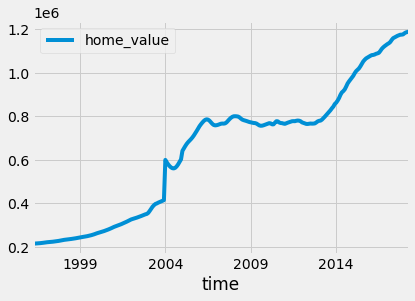

In [105]:
nyc_mean_df.plot();

In [106]:
#nyc_10021 = df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])
#avg_home_df = avg_home_df.reset_index()
#avg_home_df['time'] = pd.to_datetime(avg_home_df['index'])
#avg_home_df.set_index('time', inplace=True)
#avg_home_df.rename(columns={0: 'home_value'}, inplace=True)
#avg_home_df.drop(columns=('index'), inplace=True)

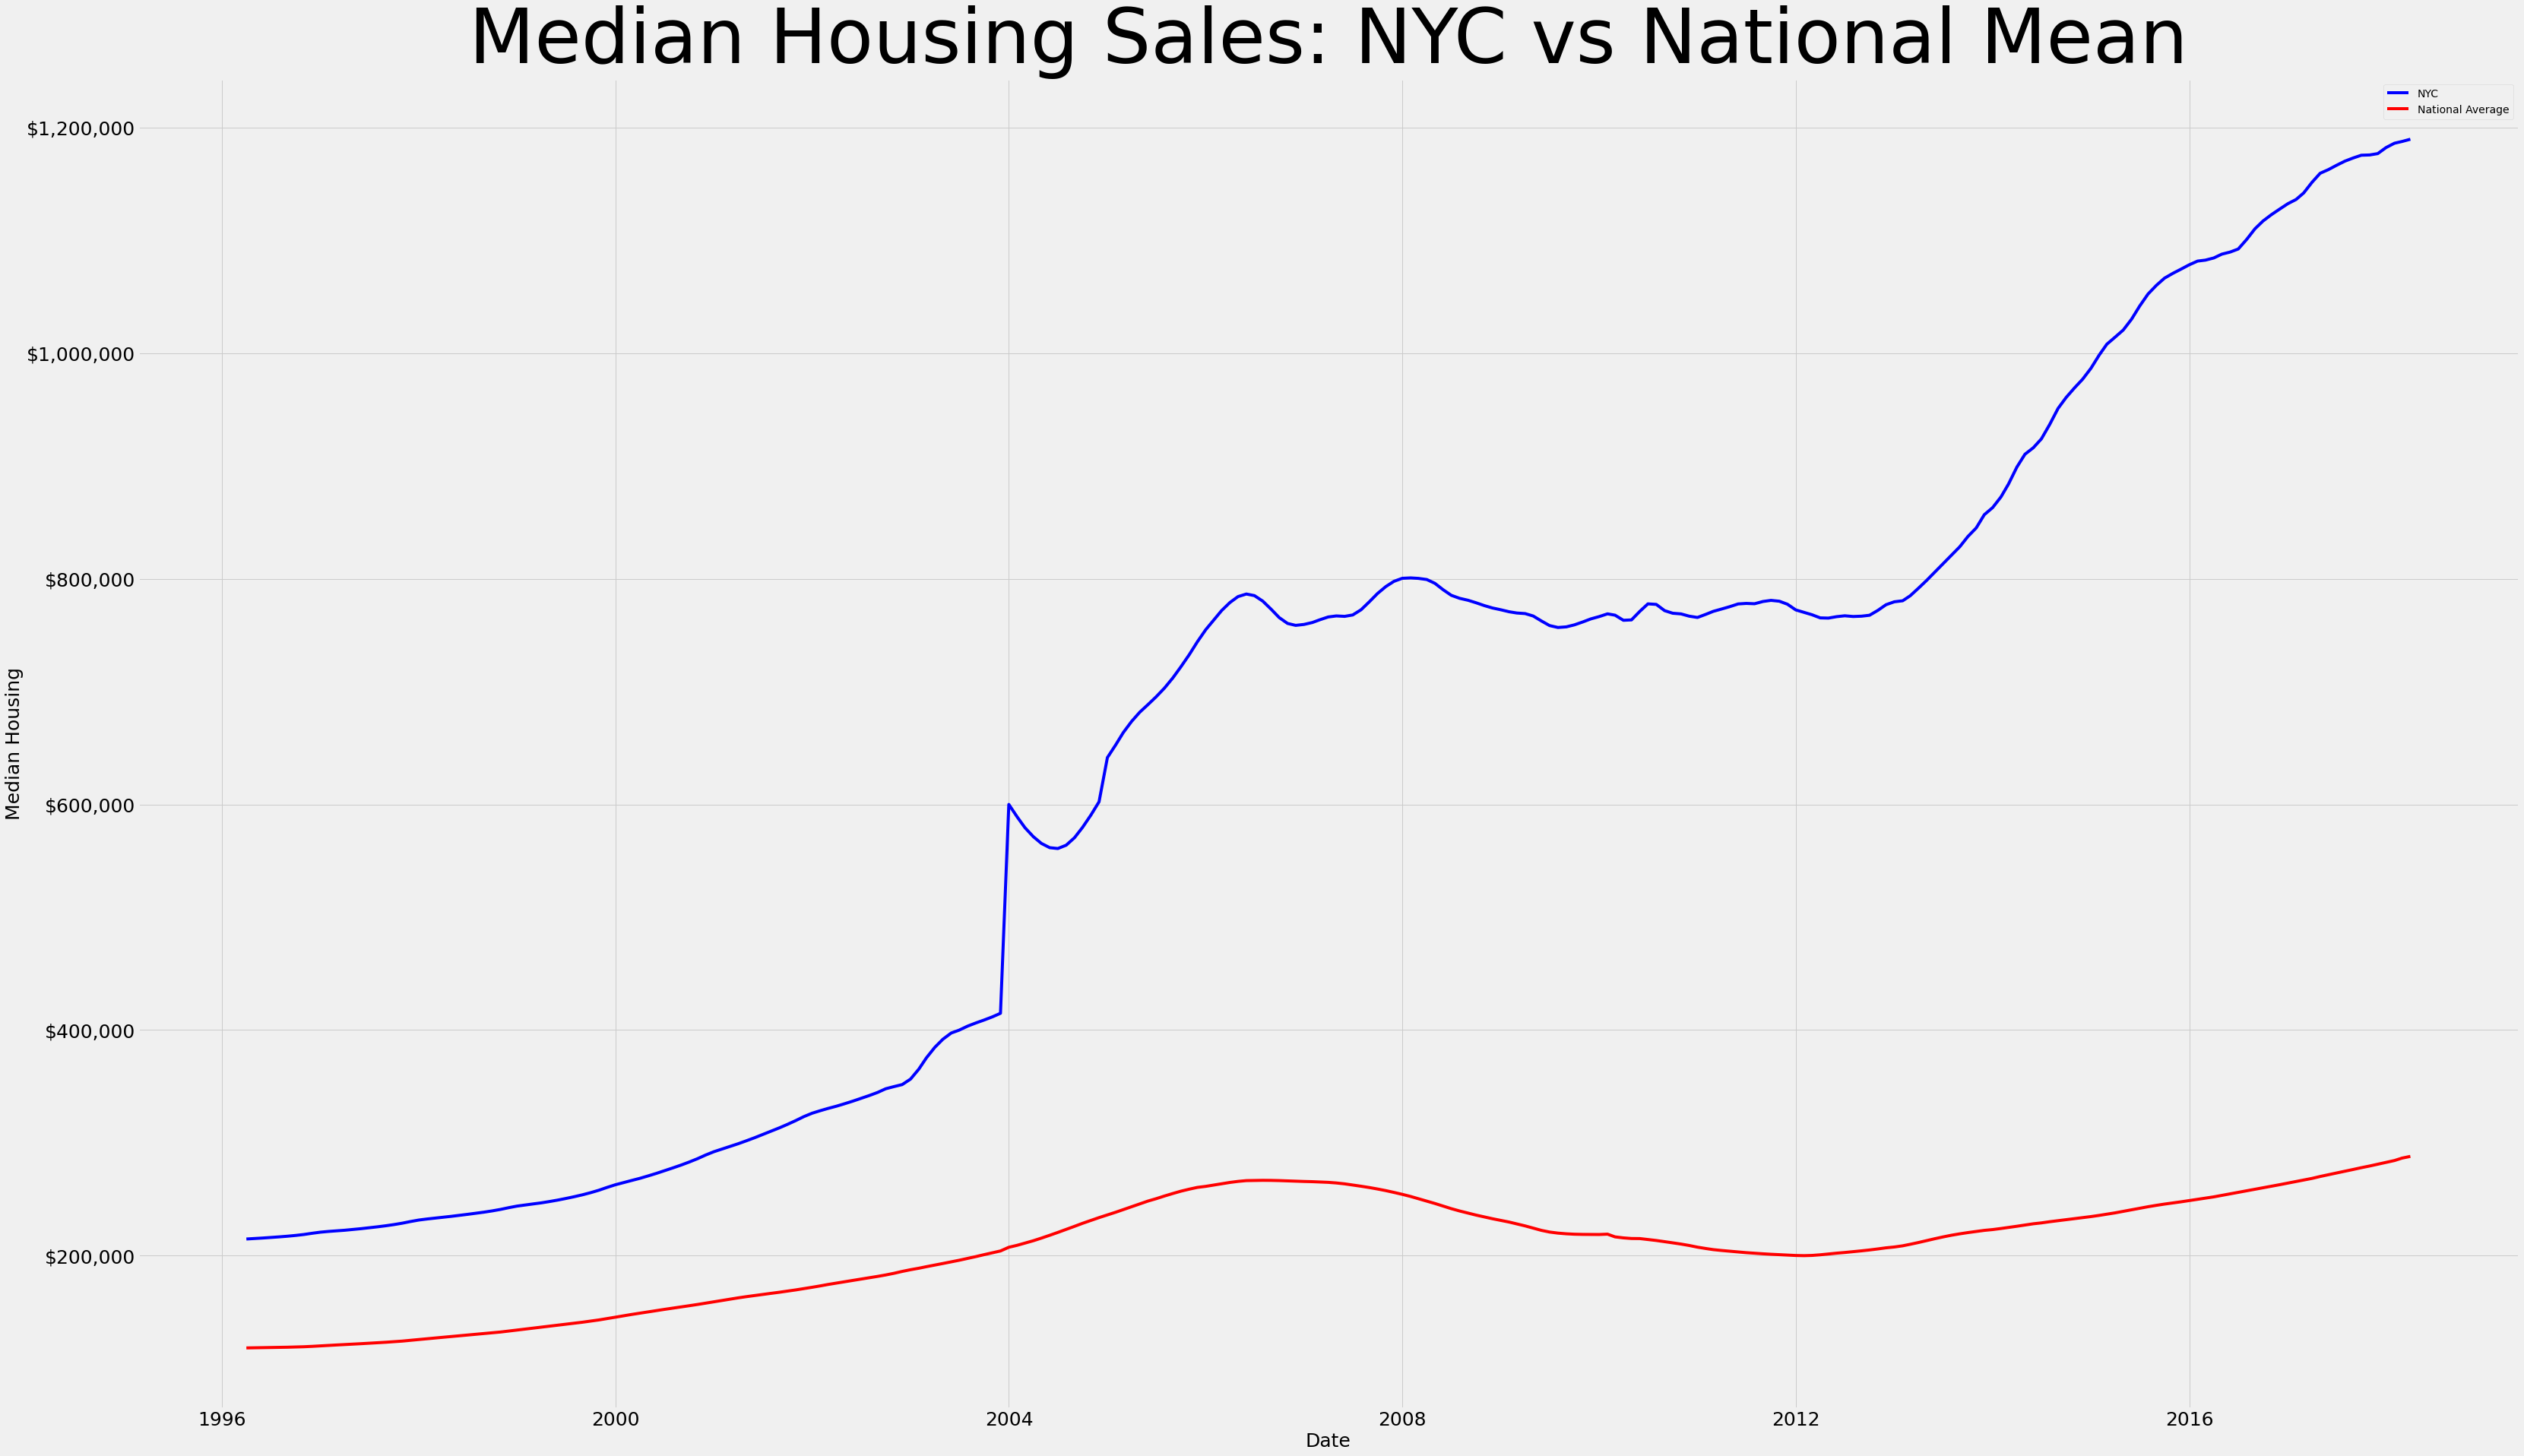

In [107]:
fig, ax = plt.subplots(figsize=(50, 30))
p = sns.lineplot(data=nyc_mean_df, x='time', y='home_value', color='blue', label='NYC');
p = sns.lineplot(data=avg_home_ts, x='time', y='home_value', color='red', label='National Average');

p.set_xlabel("Date", fontsize = 25)
p.set_ylabel("Median Housing", fontsize = 25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales: NYC vs National Mean", fontsize = 100)
plt.figsize=(50,25)

plt.show();

## Oakland CA

In [108]:
oak_data = ts[ts['City'] == 'Oakland']

In [109]:
oak_data

RegionID RegionName     City State          Metro CountyName  SizeRank  \
1022      97813      94611  Oakland    CA  San Francisco    Alameda      1023   
1379      97807      94605  Oakland    CA  San Francisco    Alameda      1380   
1464      97812      94610  Oakland    CA  San Francisco    Alameda      1465   
1477      97803      94601  Oakland    CA  San Francisco    Alameda      1478   
1681      97808      94606  Oakland    CA  San Francisco    Alameda      1682   
1768      97810      94608  Oakland    CA  San Francisco    Alameda      1769   
3115      97804      94602  Oakland    CA  San Francisco    Alameda      3116   
4084      97811      94609  Oakland    CA  San Francisco    Alameda      4085   
4449      97820      94619  Oakland    CA  San Francisco    Alameda      4450   
4712      97822      94621  Oakland    CA  San Francisco    Alameda      4713   
5919      97819      94618  Oakland    CA  San Francisco    Alameda      5920   
8052      74623      38060  Oakland    TN        Memphis    Fayette      8053   
8155      60670      07436  Oakland    NJ       New York     Bergen      8156   
9139      59743      04963  Oakland    ME        Augusta   Kennebec      9140   
10412     79162      48363  Oakland    MI        Detroit    Oakland     10413   
11573     99306      97462  Oakland    OR       Roseburg    Douglas     11574   
13082     75085      38948  Oakland    MS       no_metro  Yalobusha     13083   
14163     85244      61943  Oakland    IL     Charleston      Coles     14164   

         1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
1022  324,400.00 325,600.00 326,900.00  ...  1322100  1331900  1345900   
1379  143,600.00 143,300.00 143,100.00  ...   604100   609700   615200   
1464  307,600.00 307,500.00 307,400.00  ...  1435300  1435600  1441500   
1477  114,600.00 114,500.00 114,500.00  ...   501300   506600   514100   
1681  120,400.00 120,300.00 120,300.00  ...   599200   611000   622300   
1768         nan        nan        nan  ...   764000   765600   768600   
3115  197,900.00 198,000.00 198,100.00  ...   883600   894300   906800   
4084  160,800.00 161,000.00 161,300.00  ...   989700   993700   997800   
4449  158,700.00 158,200.00 157,800.00  ...   735000   735900   738200   
4712         nan        nan        nan  ...   363100   367400   371600   
5919  315,900.00 316,800.00 317,800.00  ...  1574600  1585800  1596000   
8052   61,600.00  61,800.00  62,200.00  ...   181300   182200   182100   
8155  206,200.00 206,300.00 206,400.00  ...   428300   433900   438600   
9139         nan        nan        nan  ...   135700   135800   135200   
10412 210,100.00 211,700.00 213,000.00  ...   416000   415800   415500   
11573  79,900.00  80,400.00  80,800.00  ...   190100   191300   194000   
13082        nan        nan        nan  ...    74300    74600    74800   
14163  24,900.00  25,100.00  25,400.00  ...    65500    65800    65900   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
1022   1364000  1379100  1394700  1409400  1418400  1420700  1417500  
1379    623900   633800   644000   653300   662900   672000   675000  
1464   1458600  1478500  1500400  1521800  1536400  1537700  1529200  
1477    521100   526700   535800   546900   555000   562000   566700  
1681    632800   646100   663100   676500   683700   691700   696800  
1768    777700   789600   801800   814200   826300   833400   832000  
3115    920700   936400   954000   969600   980700   989100   993100  
4084   1009500  1023900  1041700  1058400  1072400  1085600  1093800  
4449    743600   750000   758100   766700   773600   778500   780000  
4712    376600   381900   387400   390400   393100   399700   405500  
5919   1614900  1637200  1664700  1691600  1711500  1724100  1726200  
8052    181400   180700   182300   186700   191400   194300   196100  
8155    440600   442000   444500   446700   447700   448600   448200  
9139    135500   138500   142400   143600   147300   155500   1610

# Function

In [110]:
def city_to_datetime(df):
    """
    Takes a city_df, returns datetime for the city with the mean home values of all records from that city
    """
    city = ts.drop(['RegionID', 'RegionName', 'City', 'State', 'CountyName',
                                 'SizeRank'], axis=1)
    city = city.mean()
    city = city.reset_index()
    city['time'] = pd.to_datetime(city['index'])
    city.set_index('time', inplace=True)
    city.rename(columns={0: 'home_value'}, inplace=True)
    city.drop(columns=('index'), inplace=True)
    return city

## Getting Datetime for Key Zipcodes

In [111]:
#oak_data = df[df['City'] == 'Oakland']
data_80216 = ts[ts['RegionName'] == '80216']

In [112]:
data_80216_df = city_to_datetime(data_80216)

In [113]:
data_80216_df

home_value
time                  
1996-04-01  118,299.12
1996-05-01  118,419.04
1996-06-01  118,537.42
1996-07-01  118,653.07
1996-08-01  118,780.25
1996-09-01  118,927.53
1996-10-01  119,120.52
1996-11-01  119,345.35
1996-12-01  119,685.08
1997-01-01  120,121.27
1997-02-01  120,544.24
1997-03-01  120,896.62
1997-04-01  121,268.17
1997-05-01  121,655.90
1997-06-01  122,053.11
1997-07-01  122,456.34
1997-08-01  122,879.93
1997-09-01  123,327.40
1997-10-01  123,823.11
1997-11-01  124,353.74
1997-12-01  125,002.60
1998-01-01  125,736.67
1998-02-01  126,450.78
1998-03-01  127,086.26
1998-04-01  127,736.36
1998-05-01  128,385.01
1998-06-01  129,032.70
1998-07-01  129,676.36
1998-08-01  130,324.52
1998-09-01  130,982.62
1998-10-01  131,678.09
1998-11-01  132,399.34
1998-12-01  133,224.70
1999-01-01  134,133.59
1999-02-01  135,020.88
1999-03-01  135,841.59
1999-04-01  136,683.79
1999-05-01  137,532.15
1999-06-01  138,391.81
1999-07-01  139,265.16
1999-08-01  140,160.60
1999-09-01  141,084.83
1999-10-01  142,070.10
1999-11-01  143,104.04
1999-12-01  144,261.33
2000-01-01  145,522.06
2000-02-01  146,772.27
2000-03-01  147,943.68
2000-04-01  149,107.82
2000-05-01  150,247.76
2000-06-01  151,364.61
2000-07-01  152,457.02
2000-08-01  153,530.93
2000-09-01  154,597.19
2000-10-01  155,691.10
2000-11-01  156,804.24
2000-12-01  157,978.35
2001-01-01  159,201.78
2001-02-01  160,410.85
2001-03-01  161,555.95
2001-04-01  162,664.35
2001-05-01  163,717.37
2001-06-01  164,729.62
2001-07-01  165,707.86
2001-08-01  166,666.39
2001-09-01  167,634.31
2001-10-01  168,653.36
2001-11-01  169,714.37
2001-12-01  170,846.29
2002-01-01  172,058.12
2002-02-01  173,311.94
2002-03-01  174,550.06
2002-04-01  175,769.28
2002-05-01  176,957.56
2002-06-01  178,131.76
2002-07-01  179,301.91
2002-08-01  180,477.89
2002-09-01  181,696.49
2002-10-01  182,962.91
2002-11-01  184,453.16
2002-12-01  186,098.17
2003-01-01  187,610.68
2003-02-01  188,930.16
2003-03-01  190,295.62
2003-04-01  191,691.76
2003-05-01  193,112.99
2003-06-01  194,601.80
2003-07-01  196,006.78
2003-08-01  197,610.87
2003-09-01  199,257.67
2003-10-01  200,939.57
2003-11-01  202,586.61
2003-12-01  204,228.36
2004-01-01  207,492.62
2004-02-01  209,244.22
2004-03-01  211,168.04
2004-04-01  213,296.51
2004-05-01  215,615.42
2004-06-01  218,136.25
2004-07-01  220,658.17
2004-08-01  223,353.45
2004-09-01  226,056.90
2004-10-01  228,744.64
2004-11-01  231,299.47
2004-12-01  233,785.47
2005-01-01  236,197.43
2005-02-01  238,563.12
2005-03-01  240,871.02
2005-04-01  243,402.18
2005-05-01  245,934.66
2005-06-01  248,474.87
2005-07-01  250,549.56
2005-08-01  252,925.44
2005-09-01  255,151.63
2005-10-01  257,204.99
2005-11-01  258,995.54
2005-12-01  260,551.18
2006-01-01  261,477.01
2006-02-01  262,687.49
2006-03-01  263,850.58
2006-04-01  264,959.11
2006-05-01  265,878.71
2006-06-01  266,561.96
2006-07-01  266,695.60
2006-08-01  266,818.04
2006-09-01  266,757.14
2006-10-01  266,590.88
2006-11-01  266,316.52
2006-12-01  266,090.97
2007-01-01  265,816.83
2007-02-01  265,624.76
2007-03-01  265,366.33
2007-04-01  265,036.42
2007-05-01  264,491.78
2007-06-01  263,696.34
2007-07-01  262,677.17
2007-08-01  261,586.20
2007-09-01  260,415.58
2007-10-01  259,139.14
2007-11-01  257,695.78
2007-12-01  256,114.81
2008-01-01  254,395.86
2008-02-01  252,515.80
2008-03-01  250,538.73
2008-04-01  248,491.58
2008-05-01  246,309.46
2008-06-01  243,985.66
2008-07-01  241,710.34
2008-08-01  239,648.21
2008-09-01  237,774.27
2008-10-01  236,009.73
2008-11-01  234,330.39
2008-12-01  232,780.84
2009-01-01  231,308.67
2009-02-01  229,820.52
2009-03-01  228,199.29
2009-04-01  226,440.44
2009-05-01  224,442.20
2009-06-01  222,453.67
2009-07-01  220,988.60
2009-08-01  220,049.08
2009-09-01  219,437.45
2009-10-01  219,064.36
2009-11-01  218,900.53
2009-12-01  218,844.04
2010-01-01  218,812.23
2010-02-01  219,116.76
2010-03-01  216,704.31
2010-04-01  215,818.03
2010-05-01  215,273.66
2010-06-01  215,196.93
2010-07-01  214,382.82
2010-08-01

In [114]:
df = ts.copy()

In [115]:
df.head()

RegionID RegionName      City State              Metro CountyName  \
0     84654      60657   Chicago    IL            Chicago       Cook   
1     90668      75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982      77494      Katy    TX            Houston     Harris   
3     84616      60614   Chicago    IL            Chicago       Cook   
4     93144      79936   El Paso    TX            El Paso    El Paso   

   SizeRank    1996-04    1996-05    1996-06  ...  2017-07  2017-08  2017-09  \
0         1 334,200.00 335,400.00 336,500.00  ...  1005500  1007500  1007800   
1         2 235,700.00 236,900.00 236,700.00  ...   308000   310000   312500   
2         3 210,400.00 212,200.00 212,200.00  ...   321000   320600   320200   
3         4 498,100.00 500,900.00 503,100.00  ...  1289800  1287700  1287400   
4         5  77,300.00  77,300.00  77,300.00  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [116]:
# highest percent increase (2013 - 2018)
data_94601 = df[df['RegionName'] == '94601']
data_80216 = df[df['RegionName'] == '80216']
data_94590 = df[df['RegionName'] == '94590']
data_33460 = df[df['RegionName'] == '33460']
data_33705 = df[df['RegionName'] == '33705']
#highest value increase (2013 - 2018)
data_10021 = df[df['RegionName'] == '10021']
data_10011 = df[df['RegionName'] == '10011']
data_94027 = df[df['RegionName'] == '94027']
data_90210 = df[df['RegionName'] == '90210']
data_94301 = df[df['RegionName'] == '94301']

In [117]:
data_94601_df = city_to_datetime(data_94601)
data_80216_df = city_to_datetime(data_80216)
data_94590_df = city_to_datetime(data_94590)
data_33460_df = city_to_datetime(data_33460)
data_33705_df = city_to_datetime(data_33705)

data_10021_df = city_to_datetime(data_10021)
data_10011_df = city_to_datetime(data_10011)
data_94027_df = city_to_datetime(data_94027)
data_90210_df = city_to_datetime(data_90210)
data_94301_df = city_to_datetime(data_94301)


## Visualization: 5 Top Zip Codes (delta value increase) vs National Average

In [123]:
data_10021_df

home_value
time                  
1996-04-01  118,299.12
1996-05-01  118,419.04
1996-06-01  118,537.42
1996-07-01  118,653.07
1996-08-01  118,780.25
1996-09-01  118,927.53
1996-10-01  119,120.52
1996-11-01  119,345.35
1996-12-01  119,685.08
1997-01-01  120,121.27
1997-02-01  120,544.24
1997-03-01  120,896.62
1997-04-01  121,268.17
1997-05-01  121,655.90
1997-06-01  122,053.11
1997-07-01  122,456.34
1997-08-01  122,879.93
1997-09-01  123,327.40
1997-10-01  123,823.11
1997-11-01  124,353.74
1997-12-01  125,002.60
1998-01-01  125,736.67
1998-02-01  126,450.78
1998-03-01  127,086.26
1998-04-01  127,736.36
1998-05-01  128,385.01
1998-06-01  129,032.70
1998-07-01  129,676.36
1998-08-01  130,324.52
1998-09-01  130,982.62
1998-10-01  131,678.09
1998-11-01  132,399.34
1998-12-01  133,224.70
1999-01-01  134,133.59
1999-02-01  135,020.88
1999-03-01  135,841.59
1999-04-01  136,683.79
1999-05-01  137,532.15
1999-06-01  138,391.81
1999-07-01  139,265.16
1999-08-01  140,160.60
1999-09-01  141,084.83
1999-10-01  142,070.10
1999-11-01  143,104.04
1999-12-01  144,261.33
2000-01-01  145,522.06
2000-02-01  146,772.27
2000-03-01  147,943.68
2000-04-01  149,107.82
2000-05-01  150,247.76
2000-06-01  151,364.61
2000-07-01  152,457.02
2000-08-01  153,530.93
2000-09-01  154,597.19
2000-10-01  155,691.10
2000-11-01  156,804.24
2000-12-01  157,978.35
2001-01-01  159,201.78
2001-02-01  160,410.85
2001-03-01  161,555.95
2001-04-01  162,664.35
2001-05-01  163,717.37
2001-06-01  164,729.62
2001-07-01  165,707.86
2001-08-01  166,666.39
2001-09-01  167,634.31
2001-10-01  168,653.36
2001-11-01  169,714.37
2001-12-01  170,846.29
2002-01-01  172,058.12
2002-02-01  173,311.94
2002-03-01  174,550.06
2002-04-01  175,769.28
2002-05-01  176,957.56
2002-06-01  178,131.76
2002-07-01  179,301.91
2002-08-01  180,477.89
2002-09-01  181,696.49
2002-10-01  182,962.91
2002-11-01  184,453.16
2002-12-01  186,098.17
2003-01-01  187,610.68
2003-02-01  188,930.16
2003-03-01  190,295.62
2003-04-01  191,691.76
2003-05-01  193,112.99
2003-06-01  194,601.80
2003-07-01  196,006.78
2003-08-01  197,610.87
2003-09-01  199,257.67
2003-10-01  200,939.57
2003-11-01  202,586.61
2003-12-01  204,228.36
2004-01-01  207,492.62
2004-02-01  209,244.22
2004-03-01  211,168.04
2004-04-01  213,296.51
2004-05-01  215,615.42
2004-06-01  218,136.25
2004-07-01  220,658.17
2004-08-01  223,353.45
2004-09-01  226,056.90
2004-10-01  228,744.64
2004-11-01  231,299.47
2004-12-01  233,785.47
2005-01-01  236,197.43
2005-02-01  238,563.12
2005-03-01  240,871.02
2005-04-01  243,402.18
2005-05-01  245,934.66
2005-06-01  248,474.87
2005-07-01  250,549.56
2005-08-01  252,925.44
2005-09-01  255,151.63
2005-10-01  257,204.99
2005-11-01  258,995.54
2005-12-01  260,551.18
2006-01-01  261,477.01
2006-02-01  262,687.49
2006-03-01  263,850.58
2006-04-01  264,959.11
2006-05-01  265,878.71
2006-06-01  266,561.96
2006-07-01  266,695.60
2006-08-01  266,818.04
2006-09-01  266,757.14
2006-10-01  266,590.88
2006-11-01  266,316.52
2006-12-01  266,090.97
2007-01-01  265,816.83
2007-02-01  265,624.76
2007-03-01  265,366.33
2007-04-01  265,036.42
2007-05-01  264,491.78
2007-06-01  263,696.34
2007-07-01  262,677.17
2007-08-01  261,586.20
2007-09-01  260,415.58
2007-10-01  259,139.14
2007-11-01  257,695.78
2007-12-01  256,114.81
2008-01-01  254,395.86
2008-02-01  252,515.80
2008-03-01  250,538.73
2008-04-01  248,491.58
2008-05-01  246,309.46
2008-06-01  243,985.66
2008-07-01  241,710.34
2008-08-01  239,648.21
2008-09-01  237,774.27
2008-10-01  236,009.73
2008-11-01  234,330.39
2008-12-01  232,780.84
2009-01-01  231,308.67
2009-02-01  229,820.52
2009-03-01  228,199.29
2009-04-01  226,440.44
2009-05-01  224,442.20
2009-06-01  222,453.67
2009-07-01  220,988.60
2009-08-01  220,049.08
2009-09-01  219,437.45
2009-10-01  219,064.36
2009-11-01  218,900.53
2009-12-01  218,844.04
2010-01-01  218,812.23
2010-02-01  219,116.76
2010-03-01  216,704.31
2010-04-01  215,818.03
2010-05-01  215,273.66
2010-06-01  215,196.93
2010-07-01  214,382.82
2010-08-01

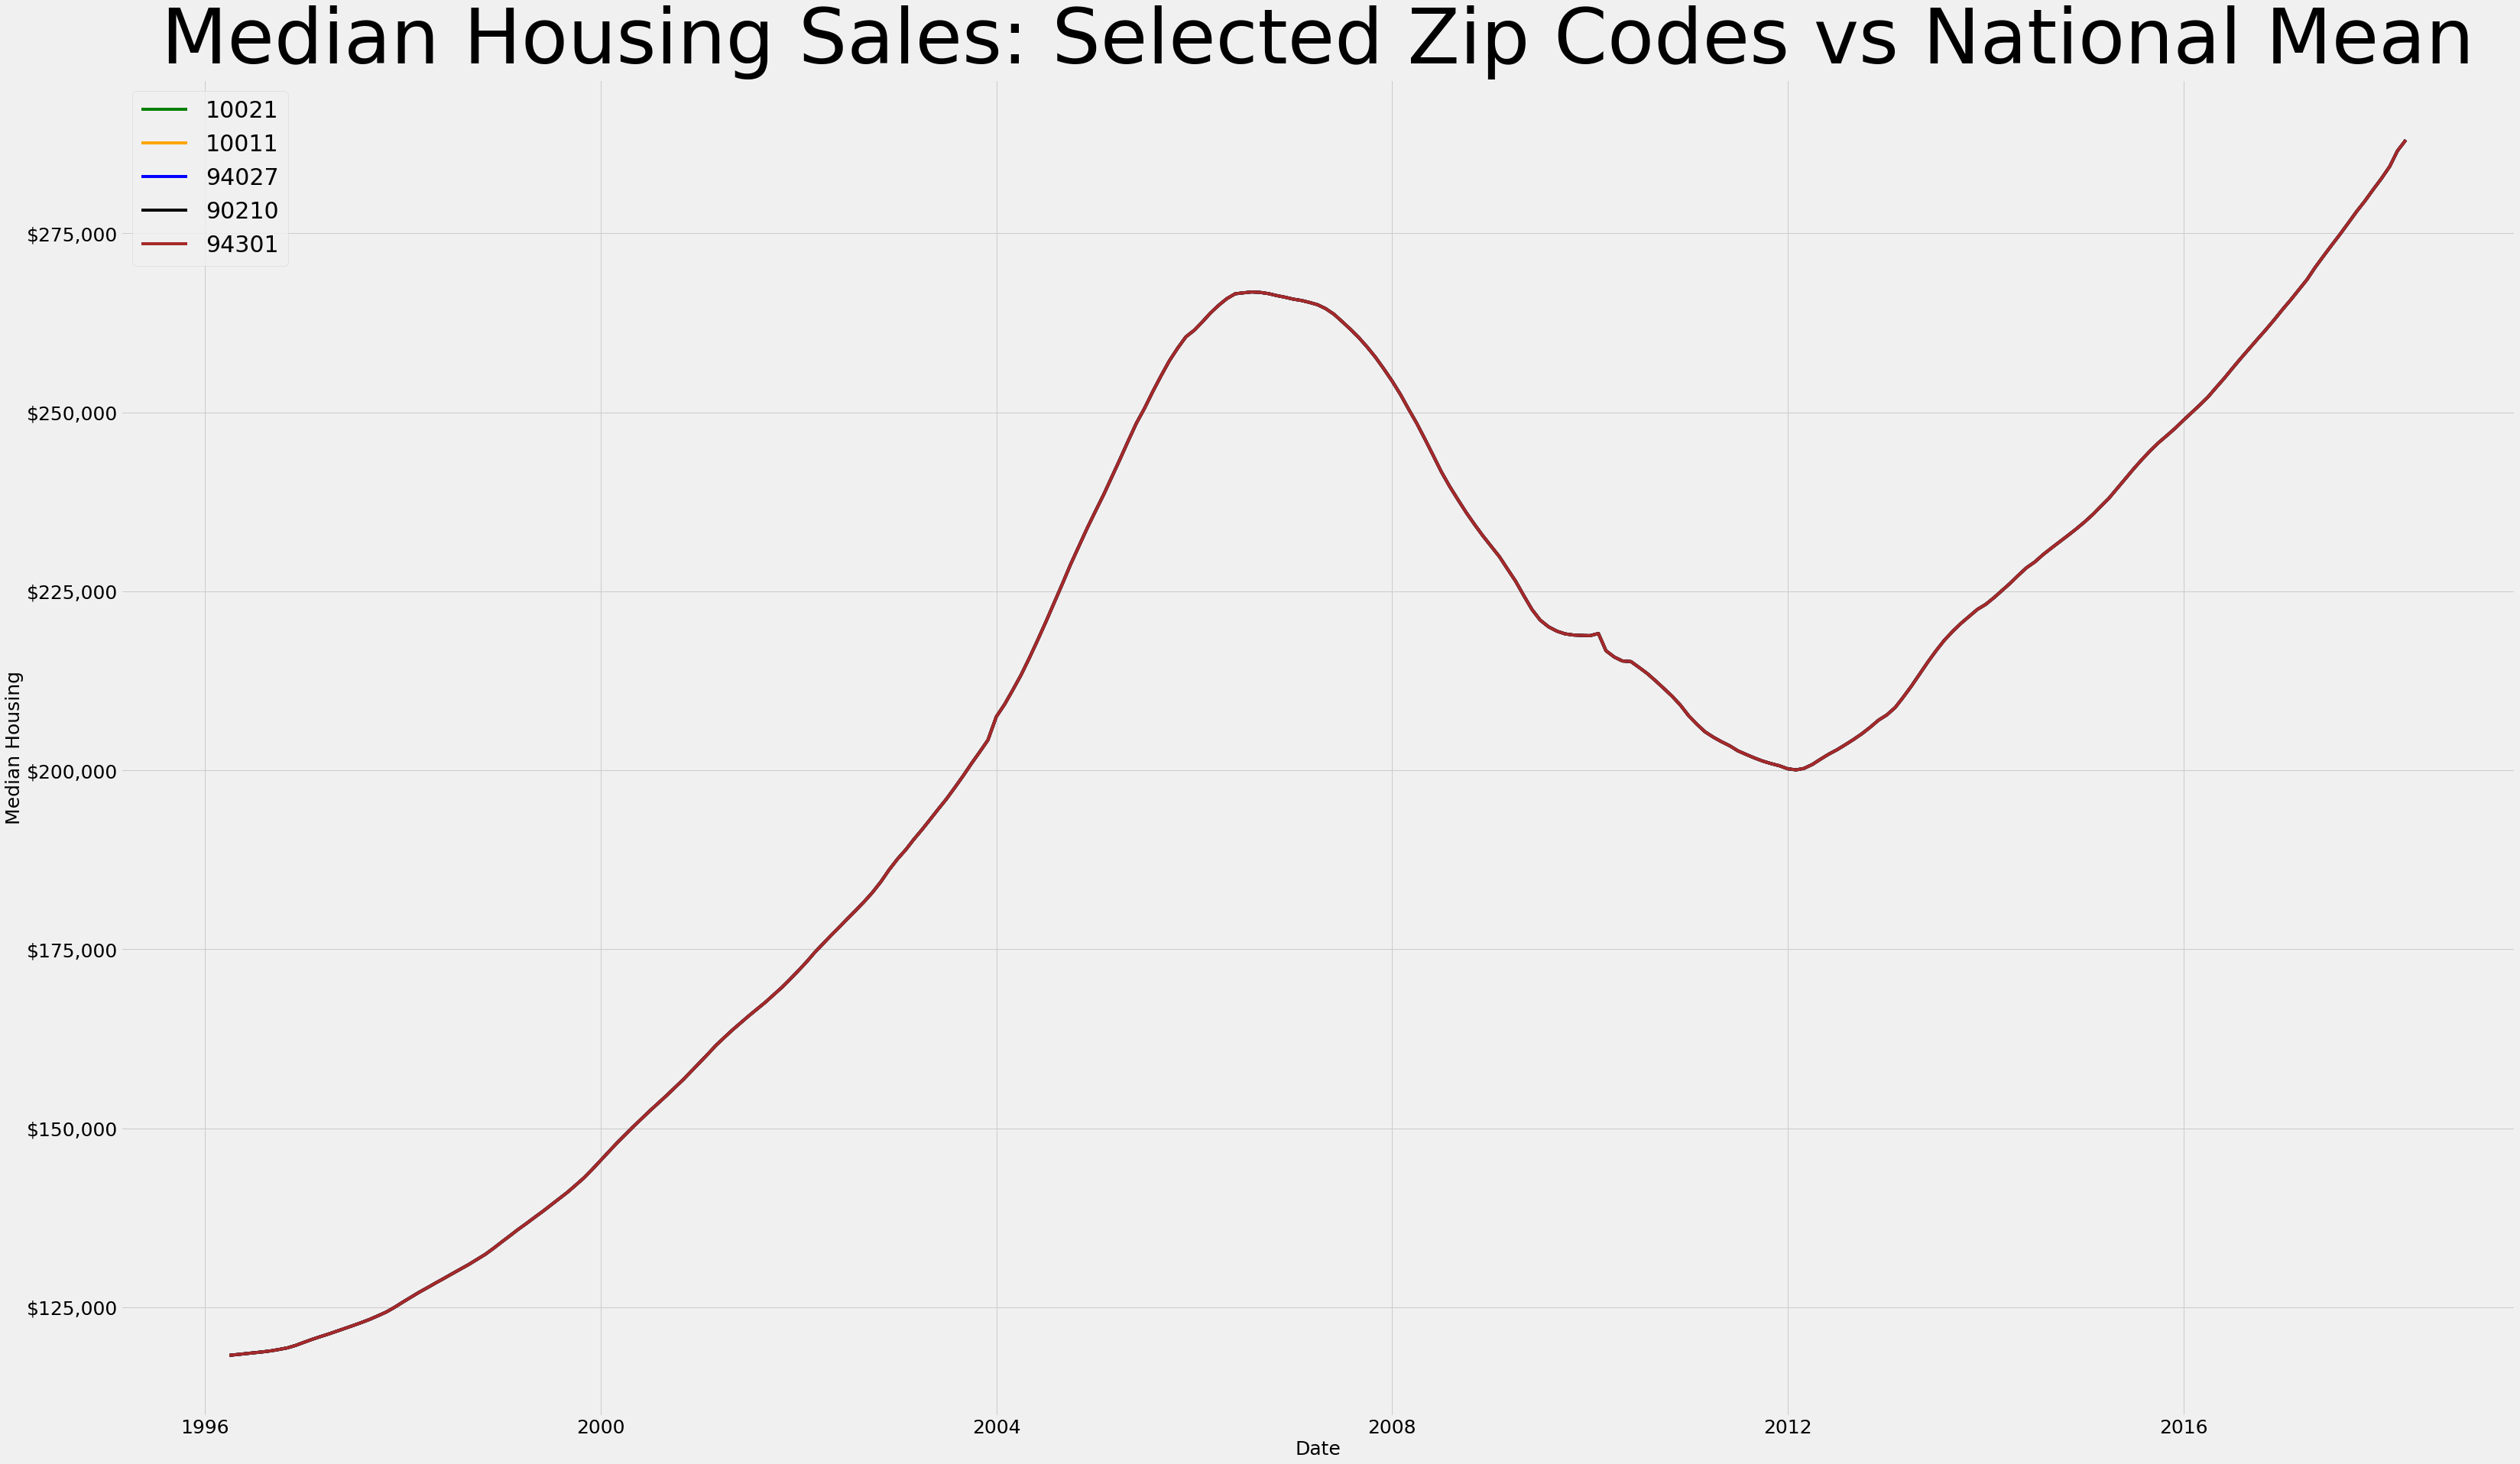

In [124]:
fig, ax = plt.subplots(figsize=(50, 30))

p = sns.lineplot(data=data_10021_df, x='time', y='home_value', color='green', label='10021');
p = sns.lineplot(data=data_10011_df, x='time', y='home_value', color='orange', label='10011');
p = sns.lineplot(data=data_94027_df, x='time', y='home_value', color='blue', label='94027');
p = sns.lineplot(data=data_90210_df, x='time', y='home_value', color='black', label='90210');
p = sns.lineplot(data=data_94301_df, x='time', y='home_value', color='brown', label='94301');


#p = sns.lineplot(data=avg_home_ts, x='time', y='home_value', color='red', label='National Average');

p.set_xlabel("Date", fontsize = 25)
p.set_ylabel("Median Housing", fontsize = 25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales: Selected Zip Codes vs National Mean", fontsize = 100)
plt.figsize=(50,25)

plt.legend(loc='best', prop={'size': 30})

plt.show();

## Visualization: 5 Top Zip Codes (delta percentage increase) vs National Average

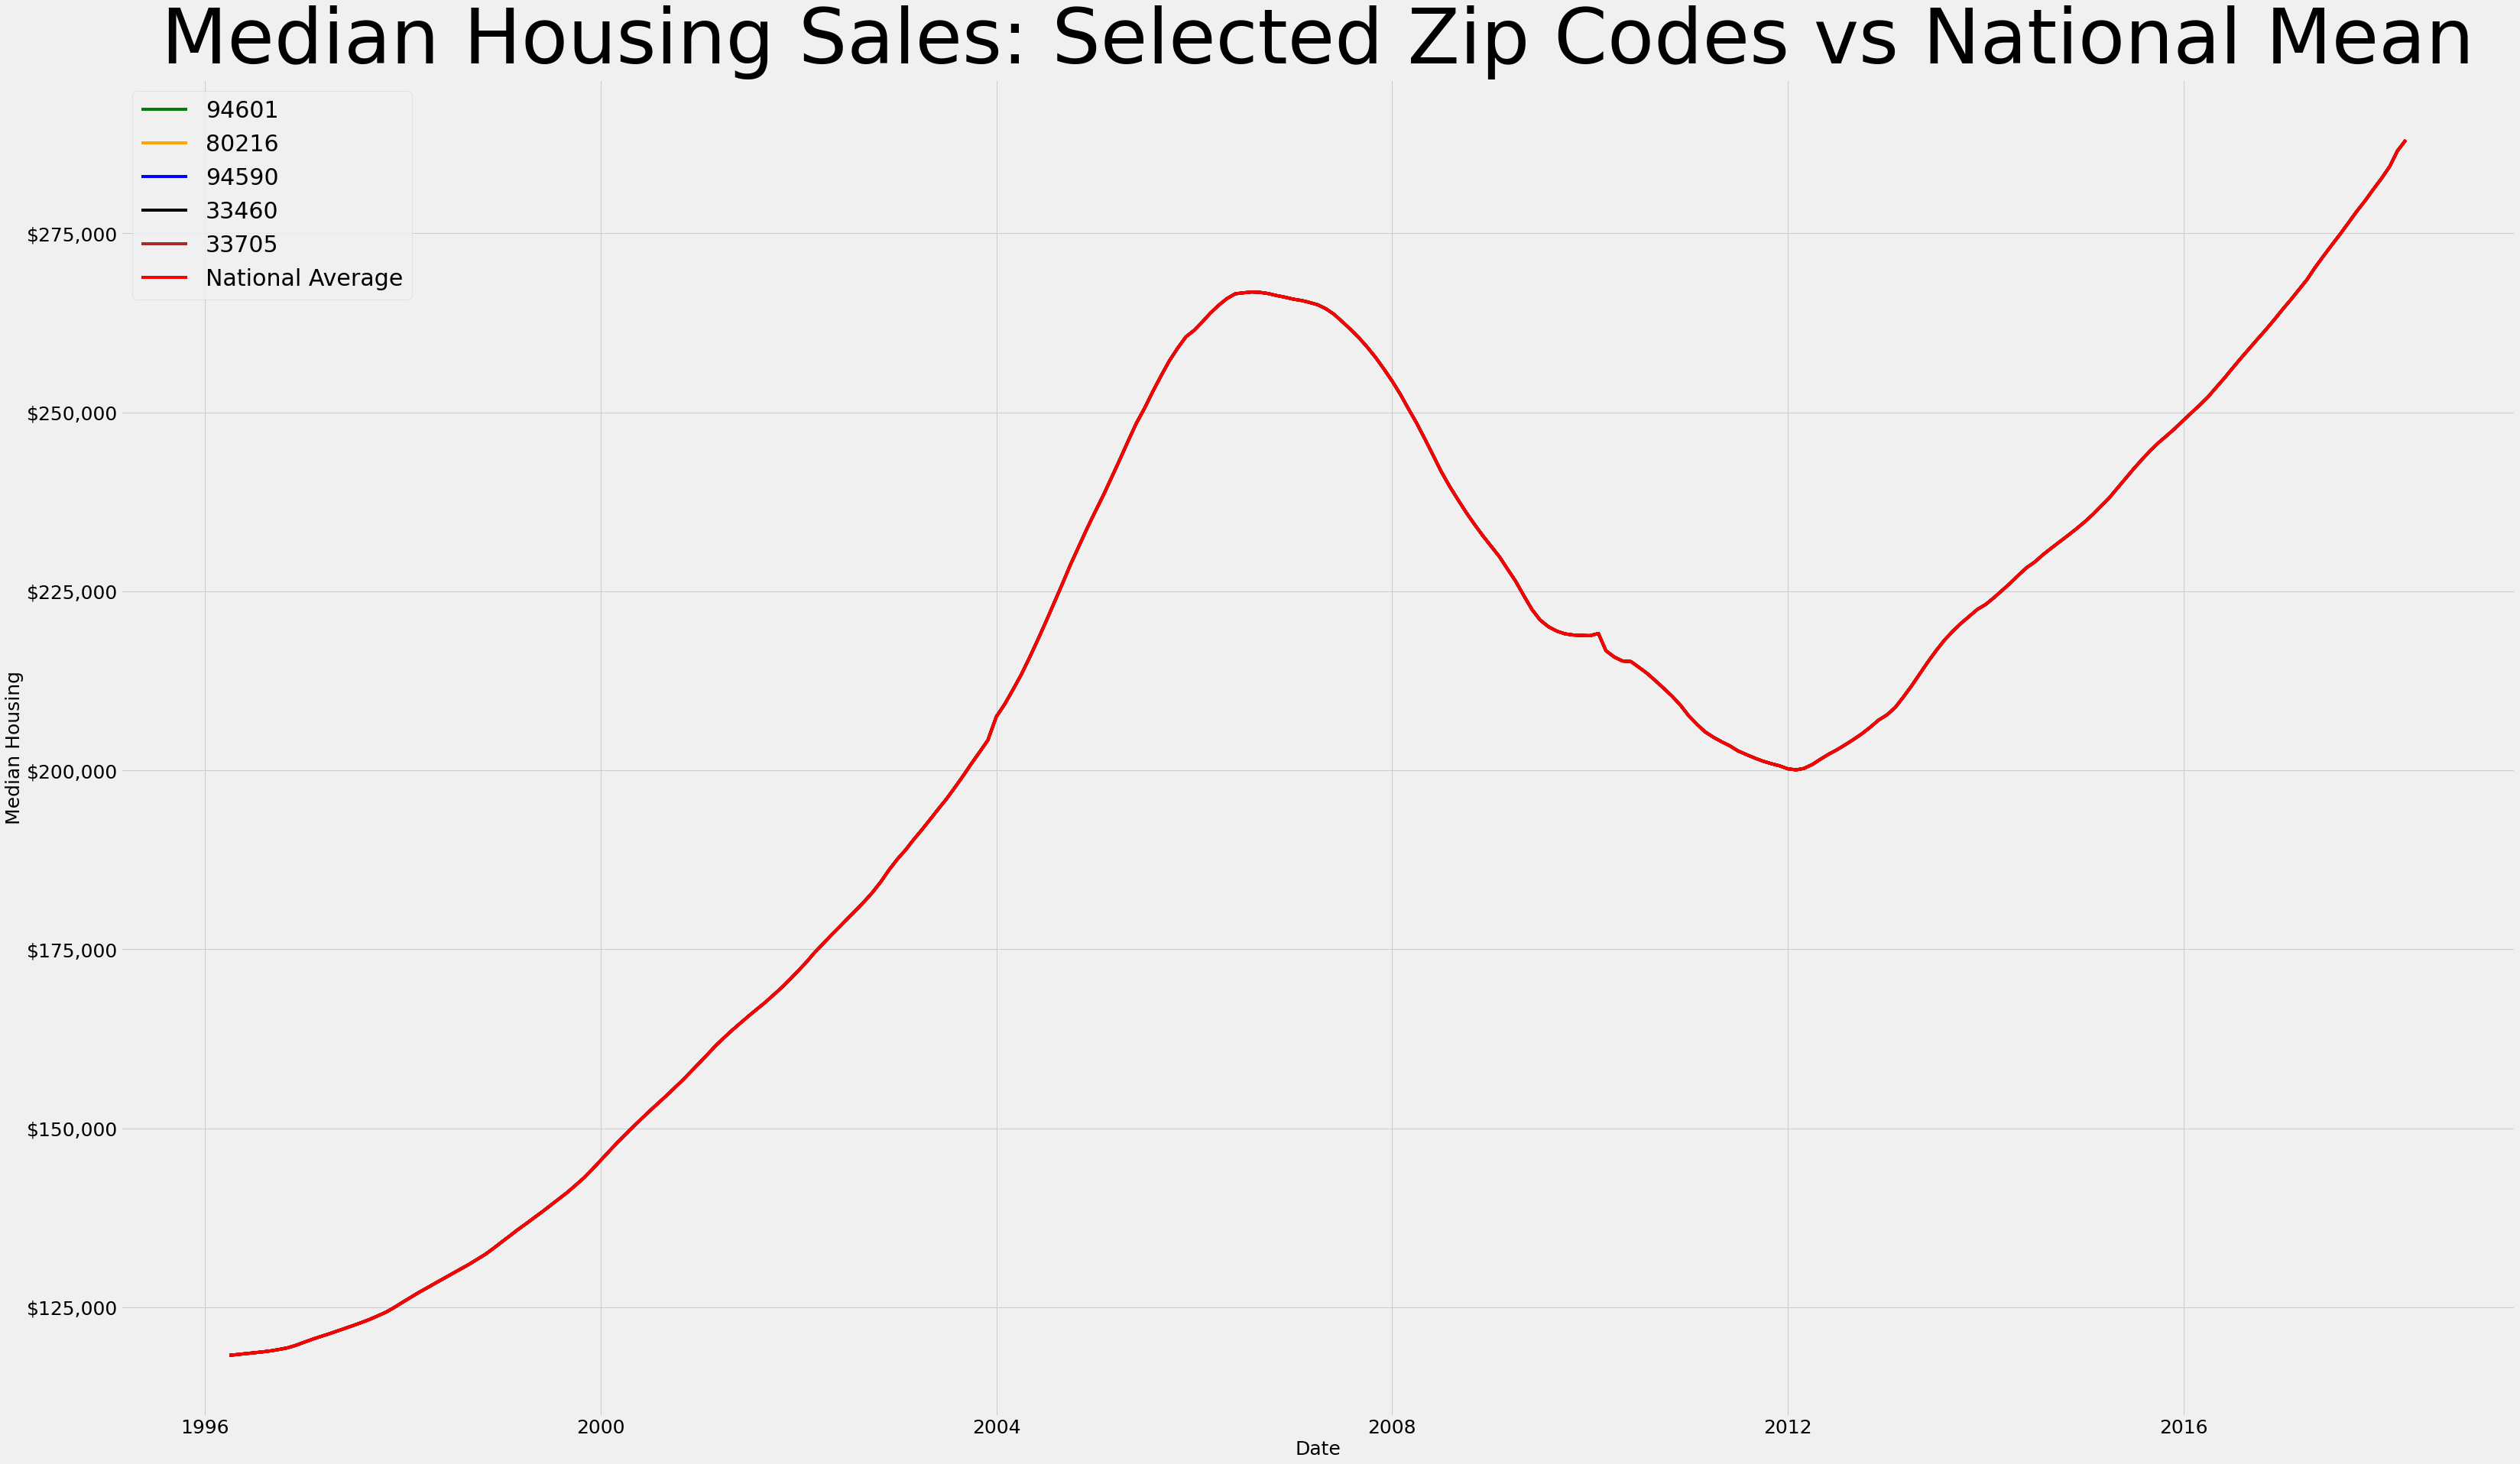

In [120]:
fig, ax = plt.subplots(figsize=(50, 30))

p = sns.lineplot(data=data_94601_df, x='time', y='home_value', color='green', label='94601');
p = sns.lineplot(data=data_80216_df, x='time', y='home_value', color='orange', label='80216');
p = sns.lineplot(data=data_94590_df, x='time', y='home_value', color='blue', label='94590');
p = sns.lineplot(data=data_33460_df, x='time', y='home_value', color='black', label='33460');
p = sns.lineplot(data=data_33705_df, x='time', y='home_value', color='brown', label='33705');


p = sns.lineplot(data=avg_home_ts, x='time', y='home_value', color='red', label='National Average');

p.set_xlabel("Date", fontsize = 25)
p.set_ylabel("Median Housing", fontsize = 25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales: Selected Zip Codes vs National Mean", fontsize = 100)
plt.figsize=(50,25)

plt.legend(loc='best', prop={'size': 30})

plt.show();

In [121]:
data_10011_df

home_value
time                  
1996-04-01  118,299.12
1996-05-01  118,419.04
1996-06-01  118,537.42
1996-07-01  118,653.07
1996-08-01  118,780.25
1996-09-01  118,927.53
1996-10-01  119,120.52
1996-11-01  119,345.35
1996-12-01  119,685.08
1997-01-01  120,121.27
1997-02-01  120,544.24
1997-03-01  120,896.62
1997-04-01  121,268.17
1997-05-01  121,655.90
1997-06-01  122,053.11
1997-07-01  122,456.34
1997-08-01  122,879.93
1997-09-01  123,327.40
1997-10-01  123,823.11
1997-11-01  124,353.74
1997-12-01  125,002.60
1998-01-01  125,736.67
1998-02-01  126,450.78
1998-03-01  127,086.26
1998-04-01  127,736.36
1998-05-01  128,385.01
1998-06-01  129,032.70
1998-07-01  129,676.36
1998-08-01  130,324.52
1998-09-01  130,982.62
1998-10-01  131,678.09
1998-11-01  132,399.34
1998-12-01  133,224.70
1999-01-01  134,133.59
1999-02-01  135,020.88
1999-03-01  135,841.59
1999-04-01  136,683.79
1999-05-01  137,532.15
1999-06-01  138,391.81
1999-07-01  139,265.16
1999-08-01  140,160.60
1999-09-01  141,084.83
1999-10-01  142,070.10
1999-11-01  143,104.04
1999-12-01  144,261.33
2000-01-01  145,522.06
2000-02-01  146,772.27
2000-03-01  147,943.68
2000-04-01  149,107.82
2000-05-01  150,247.76
2000-06-01  151,364.61
2000-07-01  152,457.02
2000-08-01  153,530.93
2000-09-01  154,597.19
2000-10-01  155,691.10
2000-11-01  156,804.24
2000-12-01  157,978.35
2001-01-01  159,201.78
2001-02-01  160,410.85
2001-03-01  161,555.95
2001-04-01  162,664.35
2001-05-01  163,717.37
2001-06-01  164,729.62
2001-07-01  165,707.86
2001-08-01  166,666.39
2001-09-01  167,634.31
2001-10-01  168,653.36
2001-11-01  169,714.37
2001-12-01  170,846.29
2002-01-01  172,058.12
2002-02-01  173,311.94
2002-03-01  174,550.06
2002-04-01  175,769.28
2002-05-01  176,957.56
2002-06-01  178,131.76
2002-07-01  179,301.91
2002-08-01  180,477.89
2002-09-01  181,696.49
2002-10-01  182,962.91
2002-11-01  184,453.16
2002-12-01  186,098.17
2003-01-01  187,610.68
2003-02-01  188,930.16
2003-03-01  190,295.62
2003-04-01  191,691.76
2003-05-01  193,112.99
2003-06-01  194,601.80
2003-07-01  196,006.78
2003-08-01  197,610.87
2003-09-01  199,257.67
2003-10-01  200,939.57
2003-11-01  202,586.61
2003-12-01  204,228.36
2004-01-01  207,492.62
2004-02-01  209,244.22
2004-03-01  211,168.04
2004-04-01  213,296.51
2004-05-01  215,615.42
2004-06-01  218,136.25
2004-07-01  220,658.17
2004-08-01  223,353.45
2004-09-01  226,056.90
2004-10-01  228,744.64
2004-11-01  231,299.47
2004-12-01  233,785.47
2005-01-01  236,197.43
2005-02-01  238,563.12
2005-03-01  240,871.02
2005-04-01  243,402.18
2005-05-01  245,934.66
2005-06-01  248,474.87
2005-07-01  250,549.56
2005-08-01  252,925.44
2005-09-01  255,151.63
2005-10-01  257,204.99
2005-11-01  258,995.54
2005-12-01  260,551.18
2006-01-01  261,477.01
2006-02-01  262,687.49
2006-03-01  263,850.58
2006-04-01  264,959.11
2006-05-01  265,878.71
2006-06-01  266,561.96
2006-07-01  266,695.60
2006-08-01  266,818.04
2006-09-01  266,757.14
2006-10-01  266,590.88
2006-11-01  266,316.52
2006-12-01  266,090.97
2007-01-01  265,816.83
2007-02-01  265,624.76
2007-03-01  265,366.33
2007-04-01  265,036.42
2007-05-01  264,491.78
2007-06-01  263,696.34
2007-07-01  262,677.17
2007-08-01  261,586.20
2007-09-01  260,415.58
2007-10-01  259,139.14
2007-11-01  257,695.78
2007-12-01  256,114.81
2008-01-01  254,395.86
2008-02-01  252,515.80
2008-03-01  250,538.73
2008-04-01  248,491.58
2008-05-01  246,309.46
2008-06-01  243,985.66
2008-07-01  241,710.34
2008-08-01  239,648.21
2008-09-01  237,774.27
2008-10-01  236,009.73
2008-11-01  234,330.39
2008-12-01  232,780.84
2009-01-01  231,308.67
2009-02-01  229,820.52
2009-03-01  228,199.29
2009-04-01  226,440.44
2009-05-01  224,442.20
2009-06-01  222,453.67
2009-07-01  220,988.60
2009-08-01  220,049.08
2009-09-01  219,437.45
2009-10-01  219,064.36
2009-11-01  218,900.53
2009-12-01  218,844.04
2010-01-01  218,812.23
2010-02-01  219,116.76
2010-03-01  216,704.31
2010-04-01  215,818.03
2010-05-01  215,273.66
2010-06-01  215,196.93
2010-07-01  214,382.82
2010-08-01

# Master Visualization: City Home Values vs National Average

NameError: name 'oak_data_mean' is not defined

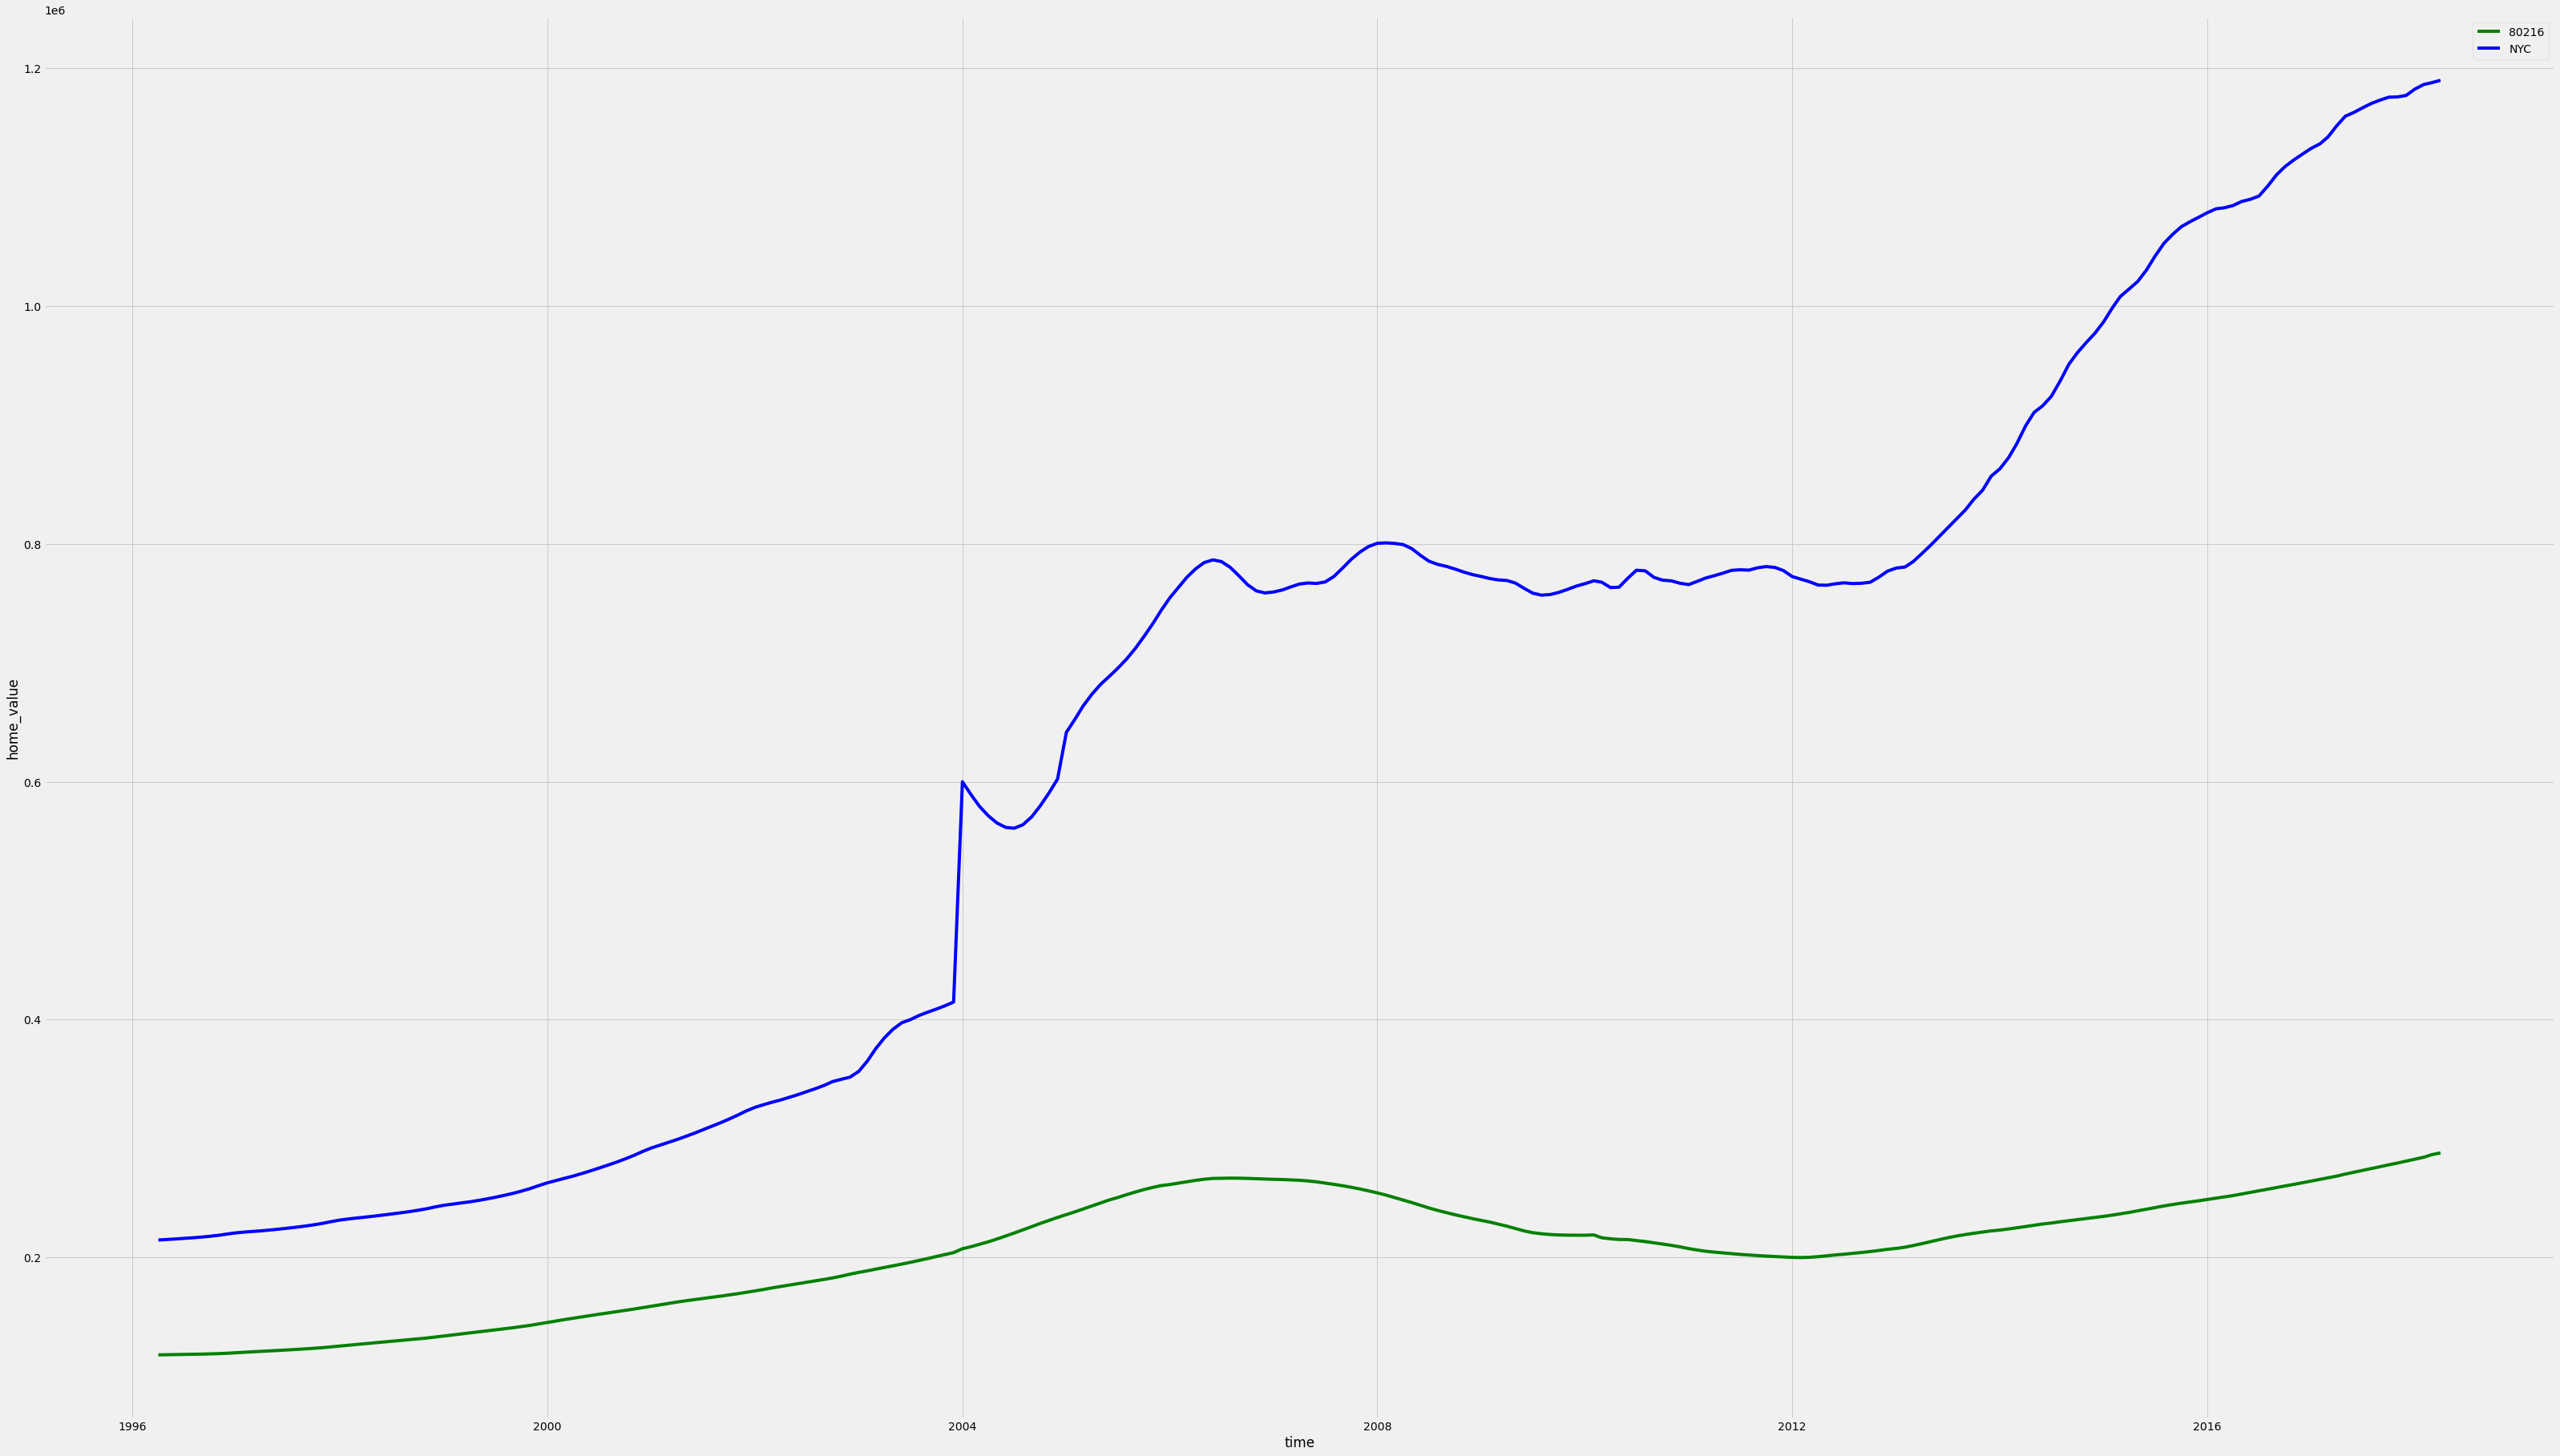

In [122]:
fig, ax = plt.subplots(figsize=(50, 30))

p = sns.lineplot(data=data_80216_df, x='time', y='home_value', color='green', label='80216');
p = sns.lineplot(data=nyc_mean_df, x='time', y='home_value', color='blue', label='NYC');
p = sns.lineplot(data=oak_data_me, x='time', y='home_value', color='black', label='Oakland');
p = sns.lineplot(data=avg_home_ts, x='time', y='home_value', color='red', label='National Average');

p.set_xlabel("Date", fontsize = 25)
p.set_ylabel("Median Housing", fontsize = 25)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales: Selected Cities vs National Mean", fontsize = 100)
plt.figsize=(50,25)

plt.show();

# Testing Grouper

In [ ]:
#year_groups = avg_home_df.groupby(pd.Grouper(freq ='A'))

In [ ]:
year_groups.mean()

## State Analysis

In [ ]:
#shows the mean home value for years 2013-apr 2018 by state
# RegionID, SizeRank, deltaRank, mean_rank are all messed up.
state_analysis_df_5 = analysis_df_5.groupby('State').mean().sort_values('delta_percent', ascending=False)
state_analysis_df_5

In [ ]:
# Dropping RegionID, SizeRank, deltaRank, mean_rank as they are all messed up.
state_analysis_df_5.drop(columns=['SizeRank', 'delta_rank', 'mean_rank'], inplace=True)

In [ ]:
state_analysis_df_5 = state_analysis_df_5.reset_index()

In [ ]:
#mean, etc
state_analysis_df_5.describe()

## Analysis
- Avg(Mean) Home Value in 2013-01: 199,231
- Avg(Mean) Home Value in 2018-04: 264,644
- Mean of 5 year date range: 228,937
- Avg Delta by price = 65,412
- Av delta increase = 32% (or .32)

### Top 10 States

In [ ]:
#Top 10 States by %Increase in Home Value
state_analysis_df_5.sort_values('delta_percent', ascending=False).head(10)

In [ ]:
#Top 10 States by Mean Home Value
state_analysis_df_5.sort_values('mean', ascending=False).head(10)

In [ ]:
#Top 10 States by Delta ammount increase
state_analysis_df_5.sort_values('delta', ascending=False).head(10)

# Archive (5/4)

## Grouping By State

In [ ]:
#recent_data.groupby('genres_list')['production_budget'].describe().sort_values('mean', ascending=False)
state_df = df.groupby('State')
state_df = state_df.mean() # Getting the mean value for each month
state_df.drop(columns=['RegionID', 'SizeRank'], axis=1, inplace=True)
state_df.head()

## Using Virginia as an example to figure out the process

In [ ]:
va_df = state_df.iloc[45]
va_df = va_df.reset_index()
va_df.rename(columns={"index": "Date", "VA": "home_sales"}, inplace=True)
va_df['Date'] = pd.to_datetime(va_df['Date'])
va_df['home_sales'] = va_df['home_sales'].apply(lambda x: float("{:.2f}".format(x)))
va_df = va_df.set_index('Date')

In [ ]:
va_df.head()

## Visualization

In [ ]:
fig, ax = plt.subplots(figsize=(50, 20))
p = sns.lineplot(data=va_df, x='Date', y='home_sales', color='blue');

p.set_xlabel("Date", fontsize = 50)
p.set_ylabel("Median Housing", fontsize = 50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales in Virginia by Year", fontsize = 100)
plt.figsize=(50,25)

plt.show();

### Histogram (needs work)

In [ ]:
va_df.hist(figsize = (12,6))
plt.show()

### Density Plot

In [ ]:
va_df.plot(kind='kde', figsize = (12,6))
plt.show()

In [ ]:
# Determine rolling statistics
roll_mean = va_df.rolling(window=12, center=False).mean()
roll_std = va_df.rolling(window=12, center=False).std()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
p = sns.lineplot(data=va_df, x='Date', y='home_sales', color='blue', label='Original');
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')

p.set_xlabel("Date", fontsize = 50)
p.set_ylabel("Median Housing", fontsize = 50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

p.set_title("Median Housing Sales in Virginia by Year", fontsize = 100)
plt.figsize=(50,25)
plt.legend(loc='best')

plt.show();

## Analysis:
- Mean increases over time and therefore is not stationary

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

## Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

### Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

## Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


## Step 1: Load the Data/Filtering for Chosen Zipcodes

## Step 2: Data Preprocessing

In [ ]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

## Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

## Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

## Step 5: ARIMA Modeling

## Step 6: Interpreting Results